# Importing Libraries and Warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

#### Notes
- Necessary libraries like Numpy is used to add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. Pandas is a high-level data manipulation tool that is built on the NumPy package.
- Matplotlib and Seaborn are libraries used for plotting graphs with help of Numpy and Pandas.
- Importing warnings (action='ignore') to suppress them.

# Importing Application and Previous Application Data set

In [2]:
app_df = pd.read_csv("application_data.csv")
app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [3]:
prev_app_df = pd.read_csv("previous_application.csv")
prev_app_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

# Meta Data Check

In [4]:
app_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
app_df.shape

(307511, 122)

In [6]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Observations
- Application Data frame has 122 columns and 307511 rows with data types ranging from int64, object, float64.

In [7]:
prev_app_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
prev_app_df.shape

(1670214, 37)

In [9]:
prev_app_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### Observations
- Previous Application Data frame has 37 columns and 1670214 rows with data types ranging from int64, object, float64.

# Data Cleaning
- Missing Value Check, Removal and imputing.

## Application Data Set

In [10]:
app_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#Data Frame with Column names and Missing %.
miss=(100*app_df.isnull().sum()/app_df.shape[0]).reset_index()\
.rename(columns={"index":"Column",0:"Missing %"}).sort_values(by="Missing %",ascending=False)
miss

Column  Missing %
76                COMMONAREA_MEDI  69.872297
48                 COMMONAREA_AVG  69.872297
62                COMMONAREA_MODE  69.872297
70       NONLIVINGAPARTMENTS_MODE  69.432963
56        NONLIVINGAPARTMENTS_AVG  69.432963
84       NONLIVINGAPARTMENTS_MEDI  69.432963
86             FONDKAPREMONT_MODE  68.386172
68          LIVINGAPARTMENTS_MODE  68.354953
54           LIVINGAPARTMENTS_AVG  68.354953
82          LIVINGAPARTMENTS_MEDI  68.354953
52                  FLOORSMIN_AVG  67.848630
66                 FLOORSMIN_MODE  67.848630
80                 FLOORSMIN_MEDI  67.848630
75               YEARS_BUILD_MEDI  66.497784
61               YEARS_BUILD_MODE  66.497784
47                YEARS_BUILD_AVG  66.497784
21                    OWN_CAR_AGE  65.990810
81                  LANDAREA_MEDI  59.376738
67                  LANDAREA_MODE  59.376738
53                   LANDAREA_AVG  59.376738
73              BASEMENTAREA_MEDI  58.515956
45               BASEMENTAREA_AVG  58.515956
59              BASEMENTAREA_MODE  58.515956
41                   EXT_SOURCE_1  56.381073
71             NONLIVINGAREA_MODE  55.179164
57              NONLIVINGAREA_AVG  55.179164
85             NONLIVINGAREA_MEDI  55.179164
77                 ELEVATORS_MEDI  53.295980
49                  ELEVATORS_AVG  53.295980
63                 ELEVATORS_MODE  53.295980
89             WALLSMATERIAL_MODE  50.840783
72                APARTMENTS_MEDI  50.749729
44                 APARTMENTS_AVG  50.749729
58                APARTMENTS_MODE  50.749729
78                 ENTRANCES_MEDI  50.348768
50                  ENTRANCES_AVG  50.348768
64                 ENTRANCES_MODE  50.348768
55                 LIVINGAREA_AVG  50.193326
69                LIVINGAREA_MODE  50.193326
83                LIVINGAREA_MEDI  50.193326
87                 HOUSETYPE_MODE  50.176091
65                 FLOORSMAX_MODE  49.760822
79                 FLOORSMAX_MEDI  49.760822
51                  FLOORSMAX_AVG  49.760822
60   YEARS_BEGINEXPLUATATION_MODE  48.781019
74   YEARS_BEGINEXPLUATATION_MEDI  48.781019
46    YEARS_BEGINEXPLUATATION_AVG  48.781019
88                 TOTALAREA_MODE  48.268517
90            EMERGENCYSTATE_MODE  47.398304
28                OCCUPATION_TYPE  31.345545
43                   EXT_SOURCE_3  19.825307
116    AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY  13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
119     AMT_REQ_CREDIT_BUREAU_MON  13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT  13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
11                NAME_TYPE_SUITE   0.420148
91       OBS_30_CNT_SOCIAL_CIRCLE   0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE   0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE   0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE   0.332021
42                   EXT_SOURCE_2   0.214626
10                AMT_GOODS_PRICE   0.090403
9                     AMT_ANNUITY   0.003902
29                CNT_FAM_MEMBERS   0.000650
95         DAYS_LAST_PHONE_CHANGE   0.000325
6                    CNT_CHILDREN   0.000000
102               FLAG_DOCUMENT_8   0.000000
2              NAME_CONTRACT_TYPE   0.000000
3                     CODE_GENDER   0.000000
4                    FLAG_OWN_CAR   0.000000
96                FLAG_DOCUMENT_2   0.000000
97                FLAG_DOCUMENT_3   0.000000
98                FLAG_DOCUMENT_4   0.000000
99                FLAG_DOCUMENT_5   0.000000
100               FLAG_DOCUMENT_6   0.000000
101               FLAG_DOCUMENT_7   0.000000
103               FLAG_DOCUMENT_9   0.000000
115              FLAG_DOCUMENT_21   0.000000
104              FLAG_DOCUMENT_10   0.000000
105              FLAG_DOCUMENT_11   0.000000
5                 FLAG_OWN_REALTY   0.000000
107              FLAG_DOCUMENT_13   0.000000
108              FLAG_DOCUMENT_14   0.000000
109              FLAG_DOCUMENT_15   0.000000
110              FLAG_DOCUMENT_16   0.000000
111              FLAG_DOCUMENT_17   0.000000
112              FLAG_

In [12]:
#Droping columns with Missing % greater than 40.
sel_col = list(miss[miss["Missing %"]<40]["Column"])
app_df_filt = app_df[sel_col]
app_df_filt

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0             Laborers      0.139376                         0.0   
1           Core staff           NaN                         0.0   
2             Laborers      0.729567                         0.0   
3             Laborers           NaN                         NaN   
4           Core staff           NaN                         0.0   
...                ...           ...                         ...   
307506     Sales staff           NaN                         NaN   
307507             NaN           NaN                         NaN   
307508        Managers      0.218859                         1.0   
307509        Laborers      0.661024                         0.0   
307510        Laborers      0.113922                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                         NaN   
307508                        0.0                         0.0   
307509                        0.0                         0.0   
307510                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             NaN                        NaN   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        NaN                        NaN   
307507                        NaN                        NaN   
307508                        1.0                        0.0   
307509                        0.0                        0.0   
307510                        2.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                              1.0   Unaccompanied                       2.0   
1                              0.0          Family                       1.0   
2                              0.0   Unaccompanied                       0.0   
3                              NaN   Unaccompanied                       2.0   
4                              0.0   Unaccompanied                       0.0   
...                            ...             ...                       ...   
307506                         NaN   Unaccompanied                       0.0   
307507                         NaN   Unaccompanied                       0.0   
307508                         1.0   Unaccompanied                       6.0   
307509                         0.0   Unaccompanied                       0.0   
307510                         1.0   Unaccompanied                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0 

In [13]:
# Droping missing values from rows where the Missing % in columns was very low
app_df_filt = app_df_filt[app_df_filt.NAME_TYPE_SUITE.notnull()\
                                    & app_df_filt.OBS_30_CNT_SOCIAL_CIRCLE.notnull()\
                                   & app_df_filt.OBS_60_CNT_SOCIAL_CIRCLE.notnull()\
                                   & app_df_filt.DEF_60_CNT_SOCIAL_CIRCLE.notnull()\
                                   & app_df_filt.EXT_SOURCE_2.notnull()\
                                   &app_df_filt.AMT_GOODS_PRICE.notnull()\
                                   &app_df_filt.AMT_ANNUITY.notnull()\
                                   &app_df_filt.CNT_FAM_MEMBERS.notnull()\
                                   &app_df_filt.DAYS_LAST_PHONE_CHANGE.notnull()]

In [14]:
#Checking no. of remaining rows
app_df_filt.shape

(304531, 73)

In [15]:
# For the remaining columns with Missing % less than 40 but not 0, they will be imputed with relevant values.
miss_filt=(100*app_df_filt.isna().sum()/app_df_filt.shape[0]).reset_index()\
.rename(columns={"index":"Column",0:"Missing %"}).sort_values(by="Missing %",ascending=False)
miss_filt

Column  Missing %
0               OCCUPATION_TYPE  31.338353
1                  EXT_SOURCE_3  19.784849
2    AMT_REQ_CREDIT_BUREAU_HOUR  13.498790
3     AMT_REQ_CREDIT_BUREAU_DAY  13.498790
4    AMT_REQ_CREDIT_BUREAU_WEEK  13.498790
5     AMT_REQ_CREDIT_BUREAU_MON  13.498790
6     AMT_REQ_CREDIT_BUREAU_QRT  13.498790
7    AMT_REQ_CREDIT_BUREAU_YEAR  13.498790
48                       TARGET   0.000000
54   WEEKDAY_APPR_PROCESS_START   0.000000
53      HOUR_APPR_PROCESS_START   0.000000
52   REG_REGION_NOT_LIVE_REGION   0.000000
51   REG_REGION_NOT_WORK_REGION   0.000000
50  LIVE_REGION_NOT_WORK_REGION   0.000000
49       REG_CITY_NOT_LIVE_CITY   0.000000
44             AMT_INCOME_TOTAL   0.000000
47       REG_CITY_NOT_WORK_CITY   0.000000
46      LIVE_CITY_NOT_WORK_CITY   0.000000
45                   FLAG_PHONE   0.000000
56         REGION_RATING_CLIENT   0.000000
43                   AMT_CREDIT   0.000000
42             FLAG_DOCUMENT_12   0.000000
55  REGION_RATING_CLIENT_W_CITY   0.000000
59            ORGANIZATION_TYPE   0.000000
57                   FLAG_EMAIL   0.000000
58             FLAG_CONT_MOBILE   0.000000
40             FLAG_DOCUMENT_19   0.000000
60              FLAG_WORK_PHONE   0.000000
61               FLAG_EMP_PHONE   0.000000
62                   FLAG_MOBIL   0.000000
63              DAYS_ID_PUBLISH   0.000000
64            DAYS_REGISTRATION   0.000000
65                DAYS_EMPLOYED   0.000000
66                   DAYS_BIRTH   0.000000
67   REGION_POPULATION_RELATIVE   0.000000
68            NAME_HOUSING_TYPE   0.000000
69           NAME_FAMILY_STATUS   0.000000
70          NAME_EDUCATION_TYPE   0.000000
71             NAME_INCOME_TYPE   0.000000
41             FLAG_DOCUMENT_20   0.000000
36             FLAG_DOCUMENT_15   0.000000
39             FLAG_DOCUMENT_18   0.000000
38             FLAG_DOCUMENT_17   0.000000
8               NAME_TYPE_SUITE   0.000000
9      OBS_30_CNT_SOCIAL_CIRCLE   0.000000
10     DEF_30_CNT_SOCIAL_CIRCLE   0.000000
11     OBS_60_CNT_SOCIAL_CIRCLE   0.000000
12     DEF_60_CNT_SOCIAL_CIRCLE   0.000000
13                 EXT_SOURCE_2   0.000000
14              AMT_GOODS_PRICE   0.000000
15                  AMT_ANNUITY   0.000000
16              CNT_FAM_MEMBERS   0.000000
17       DAYS_LAST_PHONE_CHANGE   0.000000
18                 CNT_CHILDREN   0.000000
19              FLAG_DOCUMENT_8   0.000000
20           NAME_CONTRACT_TYPE   0.000000
21                  CODE_GENDER   0.000000
22                 FLAG_OWN_CAR   0.000000
23              FLAG_DOCUMENT_2   0.000000
24              FLAG_DOCUMENT_3   0.000000
25              FLAG_DOCUMENT_4   0.000000
26              FLAG_DOCUMENT_5   0.000000
27              FLAG_DOCUMENT_6   0.000000
28              FLAG_DOCUMENT_7   0.000000
29              FLAG_DOCUMENT_9   0.000000
30             FLAG_DOCUMENT_21   0.000000
31             FLAG_DOCUMENT_10   0.000000
32             FLAG_DOCUMENT_11   0.000000
33              FLAG_OWN_REALTY   0.000000
34             FLAG_DOCUMENT_13   0.000000
35             FLAG_DOCUMENT_14   0.000000
37             FLAG_DOCUMENT_16   0.000000
72                   SK_ID_CURR   0.000000

- Imputing missing values of remaining 8 columns i.e. Top 8 columns

In [16]:
#Imputing missing values of remaining 8 columns
app_df_filt['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.261746
Sales staff              0.152035
Core staff               0.130385
Managers                 0.100978
Drivers                  0.088266
High skill tech staff    0.053856
Accountants              0.046381
Medicine staff           0.040455
Security staff           0.031885
Cooking staff            0.028207
Cleaning staff           0.022071
Private service staff    0.012573
Low-skill Laborers       0.009933
Waiters/barmen staff     0.006385
Secretaries              0.006184
Realty agents            0.003549
HR staff                 0.002669
IT staff                 0.002444
Name: OCCUPATION_TYPE, dtype: float64

In [17]:
app_df_filt['OCCUPATION_TYPE'] = app_df_filt['OCCUPATION_TYPE'].fillna('Unknown')
app_df_filt['OCCUPATION_TYPE'].value_counts(normalize=True)

Unknown                  0.313384
Laborers                 0.179719
Sales staff              0.104390
Core staff               0.089525
Managers                 0.069333
Drivers                  0.060605
High skill tech staff    0.036978
Accountants              0.031846
Medicine staff           0.027777
Security staff           0.021893
Cooking staff            0.019367
Cleaning staff           0.015154
Private service staff    0.008633
Low-skill Laborers       0.006820
Waiters/barmen staff     0.004384
Secretaries              0.004246
Realty agents            0.002437
HR staff                 0.001832
IT staff                 0.001678
Name: OCCUPATION_TYPE, dtype: float64

In [18]:
#Imputing missing values of remaining 7 columns
print(app_df_filt['EXT_SOURCE_3'].mean())
print(app_df_filt['EXT_SOURCE_3'].median())
#Median Value imputed
app_df_filt['EXT_SOURCE_3'] = app_df_filt['EXT_SOURCE_3'].fillna(0.5352762504724826)

0.5107644199098772
0.5352762504724826


In [19]:
#Imputing missing values of remaining 6 columns
print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_DAY')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
#Missing value is imputed with Mode
app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0)

Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_DAY
0.006385167582177714
0.0
0    0.0
dtype: float64


In [20]:
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())

0    0.0
dtype: float64


In [21]:
#Mean and Median and Mode of remaining 5 columns
print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_DAY')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())

print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_WEEK')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())

print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_MON')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_MON'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_MON'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())

print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_QRT')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_QRT'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_QRT'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())

print('Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_YEAR')
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
print(app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].median())

Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_DAY
0.006981167172190735
0.0
0.0
Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_WEEK
0.03448446035463874
0.0
0.0
Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_MON
0.267782236175277
0.0
0.0
Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_QRT
0.2661271035558778
0.0
0.0
Mean, Median and Mode of AMT_REQ_CREDIT_BUREAU_YEAR
1.9059041921168616
1.0
0.0


In [22]:
#Imputing Mode for the remaining 5 columns
app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.0)
app_df_filt['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.0)
app_df_filt['AMT_REQ_CREDIT_BUREAU_MON'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0)
app_df_filt['AMT_REQ_CREDIT_BUREAU_QRT'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0)
app_df_filt['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_df_filt['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.0)

In [23]:
#Checking if any Colummns has Missing % higher than 0.
app_df_filt.isnull().sum()

OCCUPATION_TYPE                0
EXT_SOURCE_3                   0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
NAME_TYPE_SUITE                0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_2                   0
AMT_GOODS_PRICE                0
AMT_ANNUITY                    0
CNT_FAM_MEMBERS                0
DAYS_LAST_PHONE_CHANGE         0
CNT_CHILDREN                   0
FLAG_DOCUMENT_8                0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_9                0
FLAG_DOCUM

In [24]:
app_df_filt.head(10)

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0        Laborers      0.139376                         0.0   
1      Core staff      0.535276                         0.0   
2        Laborers      0.729567                         0.0   
3        Laborers      0.535276                         0.0   
4      Core staff      0.535276                         0.0   
5        Laborers      0.621226                         0.0   
6     Accountants      0.492060                         0.0   
7        Managers      0.540654                         0.0   
8         Unknown      0.751724                         0.0   
9        Laborers      0.535276                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   
5                        0.0                         0.0   
6                        0.0                         0.0   
7                        0.0                         0.0   
8                        0.0                         0.0   
9                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
5                        0.0                        1.0   
6                        1.0                        1.0   
7                        0.0                        0.0   
8                        0.0                        0.0   
9                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                         1.0    Unaccompanied                       2.0   
1                         0.0           Family                       1.0   
2                         0.0    Unaccompanied                       0.0   
3                         0.0    Unaccompanied                       2.0   
4                         0.0    Unaccompanied                       0.0   
5                         1.0  Spouse, partner                       0.0   
6                         2.0    Unaccompanied                       1.0   
7                         0.0    Unaccompanied                       2.0   
8                         1.0         Children                       1.0   
9                         0.0    Unaccompanied                       2.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       1.0   
7                       0.0                       2.0   
8                       0.0                       1.0   
9                       0.0                       2.0   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  \
0                       2.0      0.262949         351000.0      24700.5   
1                       0.0      0.622246        1129500.0      35698.5   
2                       0.0      0.555912         135000.0       6750.0   
3                       0.0      0.650442         297000.0      29686.5   
4                       0.0      0.322738         513000.0      21865.5   
5                       0.0      0.354225         454500.0      27517.5   
6      

In [25]:
#There are values within some cols that aren't missing but are misleading or garbage value unless corrected accordingly.
app_df_filt['DAYS_BIRTH'] = app_df_filt['DAYS_BIRTH'].abs()
app_df_filt['DAYS_EMPLOYED'] = app_df_filt['DAYS_EMPLOYED'].abs()
app_df_filt['DAYS_REGISTRATION'] = app_df_filt['DAYS_REGISTRATION'].abs()
app_df_filt['DAYS_ID_PUBLISH'] = app_df_filt['DAYS_ID_PUBLISH'].abs()
app_df_filt['DAYS_LAST_PHONE_CHANGE'] = app_df_filt['DAYS_LAST_PHONE_CHANGE'].abs()

In [26]:
#Checking the data once again.
app_df_filt.head(15)

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0         Laborers      0.139376                         0.0   
1       Core staff      0.535276                         0.0   
2         Laborers      0.729567                         0.0   
3         Laborers      0.535276                         0.0   
4       Core staff      0.535276                         0.0   
5         Laborers      0.621226                         0.0   
6      Accountants      0.492060                         0.0   
7         Managers      0.540654                         0.0   
8          Unknown      0.751724                         0.0   
9         Laborers      0.535276                         0.0   
10      Core staff      0.363945                         0.0   
11         Unknown      0.652897                         0.0   
12        Laborers      0.176653                         0.0   
13         Drivers      0.770087                         0.0   
14        Laborers      0.535276                         0.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
5                         0.0                         0.0   
6                         0.0                         0.0   
7                         0.0                         0.0   
8                         0.0                         0.0   
9                         0.0                         0.0   
10                        0.0                         0.0   
11                        0.0                         0.0   
12                        0.0                         0.0   
13                        0.0                         0.0   
14                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        1.0   
6                         1.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         0.0                        0.0   
10                        1.0                        0.0   
11                        0.0                        0.0   
12                        1.0                        0.0   
13                        0.0                        0.0   
14                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_YEAR  NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                          1.0    Unaccompanied                       2.0   
1                          0.0           Family                       1.0   
2                          0.0    Unaccompanied                       0.0   
3                          0.0    Unaccompanied                       2.0   
4                          0.0    Unaccompanied                       0.0   
5                          1.0  Spouse, partner                       0.0   
6                          2.0    Unaccompanied                       1.0   
7                          0.0    Unaccompanied                       2.0   
8                          1.0         Children                       1.0   
9                          0.0    Unaccompanied                       2.0   
10                         0.0    Unaccompanied                       0.0   
11                         2.0         Children                       0.0   
12                         0.0    Unacc

In [27]:
app_df_filt.shape

(304531, 73)

In [28]:
#Checking for remaining number of rows.
app_df_filt.drop_duplicates()

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0             Laborers      0.139376                         0.0   
1           Core staff      0.535276                         0.0   
2             Laborers      0.729567                         0.0   
3             Laborers      0.535276                         0.0   
4           Core staff      0.535276                         0.0   
...                ...           ...                         ...   
307506     Sales staff      0.535276                         0.0   
307507         Unknown      0.535276                         0.0   
307508        Managers      0.218859                         1.0   
307509        Laborers      0.661024                         0.0   
307510        Laborers      0.113922                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        0.0                         0.0   
307507                        0.0                         0.0   
307508                        0.0                         0.0   
307509                        0.0                         0.0   
307510                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        0.0                        0.0   
307507                        0.0                        0.0   
307508                        1.0                        0.0   
307509                        0.0                        0.0   
307510                        2.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                              1.0   Unaccompanied                       2.0   
1                              0.0          Family                       1.0   
2                              0.0   Unaccompanied                       0.0   
3                              0.0   Unaccompanied                       2.0   
4                              0.0   Unaccompanied                       0.0   
...                            ...             ...                       ...   
307506                         0.0   Unaccompanied                       0.0   
307507                         0.0   Unaccompanied                       0.0   
307508                         1.0   Unaccompanied                       6.0   
307509                         0.0   Unaccompanied                       0.0   
307510                         1.0   Unaccompanied                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0 

- There are no duplicate rows.

## Summary of Data Cleaning on Application Data Frame.
- Columns containing more than 40% entries missing data is removed and only the remaining columns are taken for further analysis.
- Out of 122 columns of Application Data frame only 73 columns are taken.
- within the missing columns rows were removed containing missing data, where missing % for the columns was very low i.e. <1%
- Hence number of rows decreased from 307511 to 304531.
- No duplicates rows were found, hence total number of rows remained 304531.
- Rest of the columns and rows are not removed, as removing them will lead to loss of crucial amount of data.
- Instead, it was imputed with either relevant categorical value or Mean, Median or Mode.
- Negative values within columns were adjusted.

## Previous Application Data Set

In [29]:
prev_app_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [30]:
#Data Frame with Column names and Missing %.
miss_1=(100*prev_app_df.isnull().sum()/prev_app_df.shape[0]).reset_index()\
.rename(columns={"index":"Column",0:"Missing %"}).sort_values(by="Missing %",ascending=False)
miss_1

Column  Missing %
14     RATE_INTEREST_PRIVILEGED  99.643698
13        RATE_INTEREST_PRIMARY  99.643698
6              AMT_DOWN_PAYMENT  53.636480
12            RATE_DOWN_PAYMENT  53.636480
20              NAME_TYPE_SUITE  49.119754
36    NFLAG_INSURED_ON_APPROVAL  40.298129
35             DAYS_TERMINATION  40.298129
34                DAYS_LAST_DUE  40.298129
33    DAYS_LAST_DUE_1ST_VERSION  40.298129
32               DAYS_FIRST_DUE  40.298129
31           DAYS_FIRST_DRAWING  40.298129
7               AMT_GOODS_PRICE  23.081773
3                   AMT_ANNUITY  22.286665
28                  CNT_PAYMENT  22.286366
30          PRODUCT_COMBINATION   0.020716
5                    AMT_CREDIT   0.000060
29             NAME_YIELD_GROUP   0.000000
23               NAME_PORTFOLIO   0.000000
27         NAME_SELLER_INDUSTRY   0.000000
26             SELLERPLACE_AREA   0.000000
25                 CHANNEL_TYPE   0.000000
24            NAME_PRODUCT_TYPE   0.000000
0                    SK_ID_PREV   0.000000
22          NAME_GOODS_CATEGORY   0.000000
21             NAME_CLIENT_TYPE   0.000000
19           CODE_REJECT_REASON   0.000000
1                    SK_ID_CURR   0.000000
17                DAYS_DECISION   0.000000
16         NAME_CONTRACT_STATUS   0.000000
15       NAME_CASH_LOAN_PURPOSE   0.000000
11       NFLAG_LAST_APPL_IN_DAY   0.000000
10  FLAG_LAST_APPL_PER_CONTRACT   0.000000
9       HOUR_APPR_PROCESS_START   0.000000
8    WEEKDAY_APPR_PROCESS_START   0.000000
4               AMT_APPLICATION   0.000000
2            NAME_CONTRACT_TYPE   0.000000
18            NAME_PAYMENT_TYPE   0.000000

In [31]:
#Dropping columns with Missing % greater than 40.
sel_col_1 = list(miss_1[miss_1["Missing %"]<40]["Column"])
prev_app_df_filt = prev_app_df[sel_col_1]
prev_app_df_filt

AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0                17145.0     1730.430         12.0   
1               607500.0    25188.615         36.0   
2               112500.0    15060.735         12.0   
3               450000.0    47041.335         12.0   
4               337500.0    31924.395         24.0   
...                  ...          ...          ...   
1670209         267295.5    14704.290         30.0   
1670210          87750.0     6622.020         12.0   
1670211         105237.0    11520.855         10.0   
1670212         180000.0    18821.520         12.0   
1670213         360000.0    16431.300         48.0   

                 PRODUCT_COMBINATION  AMT_CREDIT NAME_YIELD_GROUP  \
0           POS mobile with interest     17145.0           middle   
1                   Cash X-Sell: low    679671.0       low_action   
2                  Cash X-Sell: high    136444.5             high   
3                Cash X-Sell: middle    470790.0           middle   
4                  Cash Street: high    404055.0             high   
...                              ...         ...              ...   
1670209   POS industry with interest    311400.0       low_normal   
1670210   POS industry with interest     64291.5           middle   
1670211  POS household with interest    102523.5       low_normal   
1670212             Cash X-Sell: low    191880.0       low_normal   
1670213          Cash X-Sell: middle    360000.0           middle   

        NAME_PORTFOLIO  NAME_SELLER_INDUSTRY  SELLERPLACE_AREA  \
0                  POS          Connectivity                35   
1                 Cash                   XNA                -1   
2                 Cash                   XNA                -1   
3                 Cash                   XNA                -1   
4                 Cash                   XNA                -1   
...                ...                   ...               ...   
1670209            POS             Furniture                43   
1670210            POS             Furniture                43   
1670211            POS  Consumer electronics              1370   
1670212           Cash                   XNA                -1   
1670213           Cash                   XNA                -1   

                    CHANNEL_TYPE NAME_PRODUCT_TYPE  SK_ID_PREV  \
0                   Country-wide               XNA     2030495   
1                 Contact center            x-sell     2802425   
2        Credit and cash offices            x-sell     2523466   
3        Credit and cash offices            x-sell     2819243   
4        Credit and cash offices           walk-in     1784265   
...                          ...               ...         ...   
1670209                    Stone               XNA     2300464   
1670210                    Stone               XNA     2357031   
1670211             Country-wide               XNA     2659632   
1670212          AP+ (Cash loan)            x-sell     2785582   
1670213          AP+ (Cash loan)            x-sell     2418762   

          NAME_GOODS_CATEGORY NAME_CLIENT_TYPE CODE_REJECT_REASON  SK_ID_CURR  \
0                      Mobile         Repeater                XAP      271877   
1                         XNA         Repeater                XAP      108129   
2                         XNA         Repeater                XAP      122040   
3                         XNA         Repeater                XAP      176158   
4                         XNA         Repeater                 HC      202054   
...                       ...              ...                ...         ...   
1670209             Furniture        Refreshed                XAP      352015   
1670210             Furniture              New                XAP      334635   
1670211  Consumer Electronics         Repeater                XAP      249544   
1670212                   XNA         Repeater                XAP      400317   
1670213                   XNA         Repeater        

In [32]:
#Droping rows with very low Missing % 
prev_app_df_filt = prev_app_df_filt[prev_app_df_filt.PRODUCT_COMBINATION.notnull()\
                                    & prev_app_df_filt.AMT_CREDIT.notnull()]

In [33]:
# For the remaining columns with Missing % less than 40 but not 0, they will be imputed with relevant values.
miss_1filt=(100*prev_app_df_filt.isna().sum()/prev_app_df_filt.shape[0]).reset_index()\
.rename(columns={"index":"Column",0:"Missing %"}).sort_values(by="Missing %",ascending=False)
miss_1filt

Column  Missing %
0               AMT_GOODS_PRICE  23.065789
1                   AMT_ANNUITY  22.270576
2                   CNT_PAYMENT  22.270277
14           CODE_REJECT_REASON   0.000000
24           NAME_CONTRACT_TYPE   0.000000
23              AMT_APPLICATION   0.000000
22   WEEKDAY_APPR_PROCESS_START   0.000000
21      HOUR_APPR_PROCESS_START   0.000000
20  FLAG_LAST_APPL_PER_CONTRACT   0.000000
19       NFLAG_LAST_APPL_IN_DAY   0.000000
18       NAME_CASH_LOAN_PURPOSE   0.000000
17         NAME_CONTRACT_STATUS   0.000000
16                DAYS_DECISION   0.000000
15                   SK_ID_CURR   0.000000
13             NAME_CLIENT_TYPE   0.000000
12          NAME_GOODS_CATEGORY   0.000000
11                   SK_ID_PREV   0.000000
10            NAME_PRODUCT_TYPE   0.000000
9                  CHANNEL_TYPE   0.000000
8              SELLERPLACE_AREA   0.000000
7          NAME_SELLER_INDUSTRY   0.000000
6                NAME_PORTFOLIO   0.000000
5              NAME_YIELD_GROUP   0.000000
4                    AMT_CREDIT   0.000000
3           PRODUCT_COMBINATION   0.000000
25            NAME_PAYMENT_TYPE   0.000000

- Top 3 columns will be imputed with relevant values

Mean, Median and Mode of AMT_GOODS_PRICE
227847.27928334344
112320.0
0    45000.0
dtype: float64


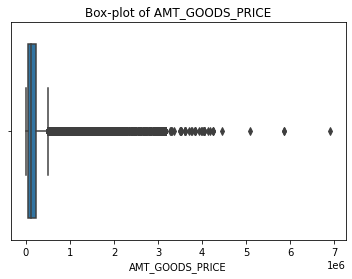

In [34]:
#Imputing missing values of remaining 3 columns
print('Mean, Median and Mode of AMT_GOODS_PRICE')
print(prev_app_df_filt['AMT_GOODS_PRICE'].mean())
print(prev_app_df_filt['AMT_GOODS_PRICE'].median())
print(prev_app_df_filt['AMT_GOODS_PRICE'].mode())
sns.boxplot(prev_app_df_filt['AMT_GOODS_PRICE'])
plt.title('Box-plot of AMT_GOODS_PRICE')
plt.show()

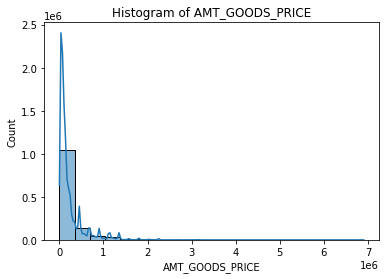

In [35]:
sns.histplot(data=prev_app_df_filt, x="AMT_GOODS_PRICE", bins=20, kde=True)
plt.title('Histogram of AMT_GOODS_PRICE')
plt.show()

#### Observations
- Non-normal or Non-Parametric Distribution.
- Median is a better indicator than Mean for analysis in this case.

In [36]:
#Dristribution of values in the AMT_GOODS_PRICE is skewed, Median will imputed in place of missing value.
prev_app_df_filt['AMT_GOODS_PRICE'] = \
prev_app_df_filt['AMT_GOODS_PRICE'].fillna(112320.0)

Mean, Median and Mode of AMT_ANNUITY
15955.13295173938
11250.0
0    2250.0
dtype: float64


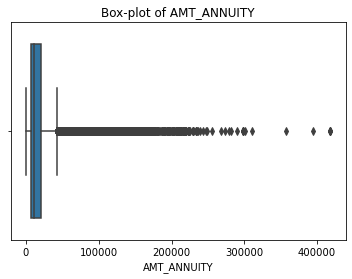

In [37]:
#Imputing missing values of remaining 2 columns
print('Mean, Median and Mode of AMT_ANNUITY')
print(prev_app_df_filt['AMT_ANNUITY'].mean())
print(prev_app_df_filt['AMT_ANNUITY'].median())
print(prev_app_df_filt['AMT_ANNUITY'].mode())
sns.boxplot(prev_app_df_filt['AMT_ANNUITY'])
plt.title('Box-plot of AMT_ANNUITY')
plt.show()

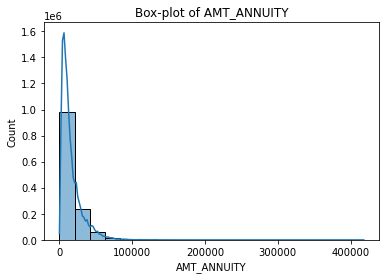

In [38]:
sns.histplot(data=prev_app_df_filt, x="AMT_ANNUITY", bins=20, kde=True)
plt.title('Box-plot of AMT_ANNUITY')
plt.show()

#### Observations
- Non-normal or Non-Parametric Distribution.
- Median is a better indicator than Mean for analysis in this case.

In [39]:
#Dristribution of values in the AMT_ANNUITY is skewed, Median will imputed in place of missing value.
prev_app_df_filt['AMT_ANNUITY'] = \
prev_app_df_filt['AMT_ANNUITY'].fillna(11250.0)

Mean, Median and Mode of CNT_PAYMENT
16.054093928811085
12.0
0    12.0
dtype: float64


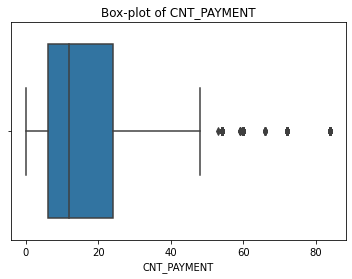

In [40]:
#Imputing missing values of last remaining column
print('Mean, Median and Mode of CNT_PAYMENT')
print(prev_app_df_filt['CNT_PAYMENT'].mean())
print(prev_app_df_filt['CNT_PAYMENT'].median())
print(prev_app_df_filt['CNT_PAYMENT'].mode())
sns.boxplot(prev_app_df_filt['CNT_PAYMENT'])
plt.title('Box-plot of CNT_PAYMENT')
plt.show()

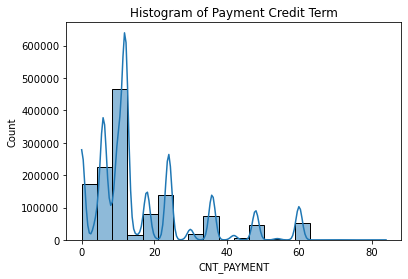

In [41]:
sns.histplot(data=prev_app_df_filt, x="CNT_PAYMENT", bins=20, kde=True)
plt.title('Histogram of Payment Credit Term')
plt.show()

#### Observations
- Non-normal or Non-Parametric Distribution.
- Median is a better indicator than Mean for analysis in this case.

In [42]:
#Dristribution of values in the CNT_PAYMENT is skewed, Median will imputed in place of missing value.
prev_app_df_filt['CNT_PAYMENT'] = \
prev_app_df_filt['CNT_PAYMENT'].fillna(12.0)

In [43]:
#Checking if any Colummns has Missing % higher than 0.
prev_app_df_filt.isnull().sum()

AMT_GOODS_PRICE                0
AMT_ANNUITY                    0
CNT_PAYMENT                    0
PRODUCT_COMBINATION            0
AMT_CREDIT                     0
NAME_YIELD_GROUP               0
NAME_PORTFOLIO                 0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
SK_ID_PREV                     0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
SK_ID_CURR                     0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
NAME_PAYMENT_TYPE              0
dtype: int64

In [44]:
prev_app_df_filt.head(20)

AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT             PRODUCT_COMBINATION  \
0           17145.0     1730.430         12.0        POS mobile with interest   
1          607500.0    25188.615         36.0                Cash X-Sell: low   
2          112500.0    15060.735         12.0               Cash X-Sell: high   
3          450000.0    47041.335         12.0             Cash X-Sell: middle   
4          337500.0    31924.395         24.0               Cash Street: high   
5          315000.0    23703.930         18.0                Cash X-Sell: low   
6          112320.0    11250.000         12.0                            Cash   
7          112320.0    11250.000         12.0                            Cash   
8          112320.0    11250.000         12.0                            Cash   
9          112320.0    11250.000         12.0                            Cash   
10         270000.0    11368.620         54.0                Cash X-Sell: low   
11         211500.0    13832.775         30.0             Cash X-Sell: middle   
12         148500.0    12165.210         24.0               Cash X-Sell: high   
13          53779.5     7654.860          8.0  POS household without interest   
14          26550.0     9644.220          3.0     POS household with interest   
15         126490.5    21307.455          6.0         POS other with interest   
16          26955.0     4187.340          8.0     POS household with interest   
17         180000.0     9000.000          0.0                     Card X-Sell   
18         180000.0    10181.700         24.0                Cash X-Sell: low   
19          45000.0     4666.500         18.0               Cash Street: high   

    AMT_CREDIT NAME_YIELD_GROUP NAME_PORTFOLIO  NAME_SELLER_INDUSTRY  \
0      17145.0           middle            POS          Connectivity   
1     679671.0       low_action           Cash                   XNA   
2     136444.5             high           Cash                   XNA   
3     470790.0           middle           Cash                   XNA   
4     404055.0             high           Cash                   XNA   
5     340573.5       low_normal           Cash                   XNA   
6          0.0              XNA            XNA                   XNA   
7          0.0              XNA            XNA                   XNA   
8          0.0              XNA            XNA                   XNA   
9          0.0              XNA            XNA                   XNA   
10    335754.0       low_normal           Cash                   XNA   
11    246397.5           middle           Cash                   XNA   
12    174361.5             high           Cash                   XNA   
13     57564.0       low_action            POS  Consumer electronics   
14     27252.0           middle            POS  Consumer electronics   
15    119853.0       low_normal            POS              Industry   
16     27297.0             high            POS  Consumer electronics   
17    180000.0              XNA          Cards                   XNA   
18    180000.0       low_normal           Cash                   XNA   
19     49455.0             high           Cash                   XNA   

    SELLERPLACE_AREA             CHANNEL_TYPE NAME_PRODUCT_TYPE  SK_ID_PREV  \
0                 35             Country-wide               XNA     2030495   
1                 -1           Contact center            x-sell     2802425   
2                 -1  Credit and cash offices            x-sell     2523466   
3                 -1  Credit and cash offices            x-sell     2819243   
4                 -1  Credit and cash offices           walk-in     1784265   
5                 -1  Credit and cash offices            x-sell     1383531   
6                 -1  Credit and cash offices               XNA     2315218   
7                 -1  Credit and cash offices               XNA     1656711   
8                 -1  Credit and cash offices               XNA     2367563   

In [45]:
#Replacing erroneous values within Previous Application Data Frame with appropriate vales for all columns.
prev_app_df_filt['SELLERPLACE_AREA'] = prev_app_df_filt['SELLERPLACE_AREA'].abs()
prev_app_df_filt['DAYS_DECISION'] = prev_app_df_filt['DAYS_DECISION'].abs()
prev_app_df_filt['SELLERPLACE_AREA'].replace(1, np.NaN, inplace=True)

In [46]:
prev_app_df_filt.head(20)

AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT             PRODUCT_COMBINATION  \
0           17145.0     1730.430         12.0        POS mobile with interest   
1          607500.0    25188.615         36.0                Cash X-Sell: low   
2          112500.0    15060.735         12.0               Cash X-Sell: high   
3          450000.0    47041.335         12.0             Cash X-Sell: middle   
4          337500.0    31924.395         24.0               Cash Street: high   
5          315000.0    23703.930         18.0                Cash X-Sell: low   
6          112320.0    11250.000         12.0                            Cash   
7          112320.0    11250.000         12.0                            Cash   
8          112320.0    11250.000         12.0                            Cash   
9          112320.0    11250.000         12.0                            Cash   
10         270000.0    11368.620         54.0                Cash X-Sell: low   
11         211500.0    13832.775         30.0             Cash X-Sell: middle   
12         148500.0    12165.210         24.0               Cash X-Sell: high   
13          53779.5     7654.860          8.0  POS household without interest   
14          26550.0     9644.220          3.0     POS household with interest   
15         126490.5    21307.455          6.0         POS other with interest   
16          26955.0     4187.340          8.0     POS household with interest   
17         180000.0     9000.000          0.0                     Card X-Sell   
18         180000.0    10181.700         24.0                Cash X-Sell: low   
19          45000.0     4666.500         18.0               Cash Street: high   

    AMT_CREDIT NAME_YIELD_GROUP NAME_PORTFOLIO  NAME_SELLER_INDUSTRY  \
0      17145.0           middle            POS          Connectivity   
1     679671.0       low_action           Cash                   XNA   
2     136444.5             high           Cash                   XNA   
3     470790.0           middle           Cash                   XNA   
4     404055.0             high           Cash                   XNA   
5     340573.5       low_normal           Cash                   XNA   
6          0.0              XNA            XNA                   XNA   
7          0.0              XNA            XNA                   XNA   
8          0.0              XNA            XNA                   XNA   
9          0.0              XNA            XNA                   XNA   
10    335754.0       low_normal           Cash                   XNA   
11    246397.5           middle           Cash                   XNA   
12    174361.5             high           Cash                   XNA   
13     57564.0       low_action            POS  Consumer electronics   
14     27252.0           middle            POS  Consumer electronics   
15    119853.0       low_normal            POS              Industry   
16     27297.0             high            POS  Consumer electronics   
17    180000.0              XNA          Cards                   XNA   
18    180000.0       low_normal           Cash                   XNA   
19     49455.0             high           Cash                   XNA   

    SELLERPLACE_AREA             CHANNEL_TYPE NAME_PRODUCT_TYPE  SK_ID_PREV  \
0               35.0             Country-wide               XNA     2030495   
1                NaN           Contact center            x-sell     2802425   
2                NaN  Credit and cash offices            x-sell     2523466   
3                NaN  Credit and cash offices            x-sell     2819243   
4                NaN  Credit and cash offices           walk-in     1784265   
5                NaN  Credit and cash offices            x-sell     1383531   
6                NaN  Credit and cash offices               XNA     2315218   
7                NaN  Credit and cash offices               XNA     1656711   
8                NaN  Credit and cash offices               XNA     2367563   

In [47]:
prev_app_df_filt.shape

(1669867, 26)

## Summary of Data Cleaning on Previous Application Data Frame.
- Columns containing more than 40% entries missing data is removed and only the remaining columns are taken for further analysis.
- Out of 37 columns of Application Data frame only 26 columns were taken.
- within the missing columns rows were removed containing missing data, where missing % for the columns was very low i.e. <1%
- Hence number of rows decreased from 1670214 to 1669867.
- Rest of the columns and rows are not removed, as removing them will lead to loss of crucial amount of data.
- Instead, it was imputed with either relevant categorical value or Mean, Median or Mode.

## Common columns btwn Application and Previous Application Data set

In [48]:
extra_col = []
same_col = []
for col in app_df_filt.columns:
    if col in prev_app_df_filt.columns:
        same_col.append(col)
    else:
        extra_col.append(col)
print(same_col)
print(len(same_col))
print(len(extra_col))

['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'SK_ID_CURR']
7
66


#### Observations
- The following 7 columns were common in both data sets:-
- ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'SK_ID_CURR']
- Out of which 'SK_ID_CURR' column was used to merge two data sets and 'TARGET' column was added to previous application data set.

## Merging Application and Previous Application Dataframe.

In [49]:
merge_df = pd.merge(app_df_filt[['SK_ID_CURR','TARGET']], prev_app_df_filt, how = 'left', on =['SK_ID_CURR'])
merge_df.head(20)

SK_ID_CURR  TARGET  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0       100002       1        179055.00     9251.775         24.0   
1       100003       0        900000.00    98356.995         12.0   
2       100003       0        337500.00    64567.665          6.0   
3       100003       0         68809.50     6737.310         12.0   
4       100004       0         24282.00     5357.250          4.0   
5       100006       0        675000.00    24246.000         48.0   
6       100006       0        112320.00    11250.000         12.0   
7       100006       0        334917.00    29027.520         12.0   
8       100006       0        270000.00    13500.000          0.0   
9       100006       0        454500.00    39954.510         18.0   
10      100006       0        112320.00    11250.000         12.0   
11      100006       0         26912.34     2482.920         12.0   
12      100006       0        112320.00    11250.000         12.0   
13      100006       0        688500.00    32696.100         48.0   
14      100007       0        180000.00    16509.600         18.0   
15      100007       0        225000.00    13010.985         48.0   
16      100007       0        247500.00    16037.640         24.0   
17      100007       0         17176.50     1834.290         10.0   
18      100007       0         31005.00     3601.530         12.0   
19      100007       0        202500.00    22678.785         12.0   

            PRODUCT_COMBINATION  AMT_CREDIT NAME_YIELD_GROUP NAME_PORTFOLIO  \
0       POS other with interest    179055.0       low_normal            POS   
1              Cash X-Sell: low   1035882.0       low_normal           Cash   
2    POS industry with interest    348637.5           middle            POS   
3   POS household with interest     68053.5           middle            POS   
4   POS mobile without interest     20106.0           middle            POS   
5              Cash X-Sell: low    675000.0       low_normal           Cash   
6                   Card Street         0.0              XNA            XNA   
7   POS household with interest    267930.0             high            POS   
8                   Card X-Sell    270000.0              XNA          Cards   
9             Cash X-Sell: high    481495.5             high           Cash   
10                         Cash         0.0              XNA            XNA   
11   POS industry with interest     24219.0           middle            POS   
12                         Cash         0.0              XNA            XNA   
13             Cash X-Sell: low    906615.0       low_normal           Cash   
14            Cash Street: high    180000.0             high           Cash   
15          Cash X-Sell: middle    284400.0           middle           Cash   
16          Cash X-Sell: middle    274288.5           middle           Cash   
17  POS household with interest     14616.0             high            POS   
18     POS mobile with interest     30663.0             high            POS   
19          Cash X-Sell: middle    215865.0           middle           Cash   

    NAME_SELLER_INDUSTRY  SELLERPLACE_AREA             CHANNEL_TYPE  \
0        Auto technology             500.0                    Stone   
1                    XNA               NaN  Credit and cash offices   
2              Furniture            1400.0                    Stone   
3   Consumer electronics             200.0             Country-wide   
4           Connectivity              30.0         Regional / Local   
5                    XNA               NaN  Credit and cash offices   
6                    XNA               NaN  Credit and cash offices   
7   Consumer electronics            8025.0             Country-wide   
8                    XNA               NaN  Credit and cash offices   
9                    XNA               NaN  Credit and cash offices   
10                   XNA               NaN  Credit and cash offices   
11          Construction              30.0

In [50]:
merge_df.shape

(1420436, 27)

In [51]:
merge_df.drop_duplicates(subset=None, keep='first', inplace=True)
merge_df.shape

(1420436, 27)

- Dropping duplicate rows, no duplicate rows found.

In [52]:
merge_df.drop(["SK_ID_PREV"], axis = 1, inplace = True)
merge_df.shape

(1420436, 26)

- 'SK_ID_PREV' Column removed as it is irrelevant.

In [53]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420436 entries, 0 to 1420435
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1420436 non-null  int64  
 1   TARGET                       1420436 non-null  int64  
 2   AMT_GOODS_PRICE              1404812 non-null  float64
 3   AMT_ANNUITY                  1404812 non-null  float64
 4   CNT_PAYMENT                  1404812 non-null  float64
 5   PRODUCT_COMBINATION          1404812 non-null  object 
 6   AMT_CREDIT                   1404812 non-null  float64
 7   NAME_YIELD_GROUP             1404812 non-null  object 
 8   NAME_PORTFOLIO               1404812 non-null  object 
 9   NAME_SELLER_INDUSTRY         1404812 non-null  object 
 10  SELLERPLACE_AREA             767141 non-null   float64
 11  CHANNEL_TYPE                 1404812 non-null  object 
 12  NAME_PRODUCT_TYPE            1404812 non-n

In [54]:
# Dividing the Mereged Data Frame into two Data frames of  defaulters(client with payment difficulties, i.e. Target=1)
#and non-defaulters(all other, i.e. Target=0)

D_merge_df=merge_df.loc[merge_df["TARGET"]==1]
ND_merge_df=merge_df.loc[merge_df["TARGET"]==0]

In [55]:
#Number of Defaulters
D_merge_df['TARGET'].value_counts()

1    122651
Name: TARGET, dtype: int64

In [56]:
#Number of Non-Defaulter
ND_merge_df['TARGET'].value_counts()

0    1297785
Name: TARGET, dtype: int64

## Numerical and Categorical Data in Merged Previous Application Data Frame

### Numerical Data

In [57]:
num=[column for column in merge_df.columns if merge_df[column].dtype in ["int64","float64"]]
num

['SK_ID_CURR',
 'TARGET',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_PAYMENT',
 'AMT_CREDIT',
 'SELLERPLACE_AREA',
 'DAYS_DECISION',
 'NFLAG_LAST_APPL_IN_DAY',
 'HOUR_APPR_PROCESS_START',
 'AMT_APPLICATION']

In [58]:
#Creating a data frame consisting categorical variable from Merge_df(Prev_Application)
merge_n_df = pd.DataFrame()
for col in num:
    merge_n_df[col] = merge_df[col]
merge_n_df.drop(['SK_ID_CURR'], axis=1, inplace = True)
merge_n_df.drop(['TARGET'], axis=1, inplace = True)

#'SK_ID_CURR' col is dropped as it wont be showing any correlation, i.e. it is an unique identifier.
#'TARGET' col is also dropped because it actually a categorical nominal data 
merge_n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420436 entries, 0 to 1420435
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   AMT_GOODS_PRICE          1404812 non-null  float64
 1   AMT_ANNUITY              1404812 non-null  float64
 2   CNT_PAYMENT              1404812 non-null  float64
 3   AMT_CREDIT               1404812 non-null  float64
 4   SELLERPLACE_AREA         767141 non-null   float64
 5   DAYS_DECISION            1404812 non-null  float64
 6   NFLAG_LAST_APPL_IN_DAY   1404812 non-null  float64
 7   HOUR_APPR_PROCESS_START  1404812 non-null  float64
 8   AMT_APPLICATION          1404812 non-null  float64
dtypes: float64(9)
memory usage: 108.4 MB


In [59]:
merge_n_df.head(20)

AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  AMT_CREDIT  SELLERPLACE_AREA  \
0         179055.00     9251.775         24.0    179055.0             500.0   
1         900000.00    98356.995         12.0   1035882.0               NaN   
2         337500.00    64567.665          6.0    348637.5            1400.0   
3          68809.50     6737.310         12.0     68053.5             200.0   
4          24282.00     5357.250          4.0     20106.0              30.0   
5         675000.00    24246.000         48.0    675000.0               NaN   
6         112320.00    11250.000         12.0         0.0               NaN   
7         334917.00    29027.520         12.0    267930.0            8025.0   
8         270000.00    13500.000          0.0    270000.0               NaN   
9         454500.00    39954.510         18.0    481495.5               NaN   
10        112320.00    11250.000         12.0         0.0               NaN   
11         26912.34     2482.920         12.0     24219.0              30.0   
12        112320.00    11250.000         12.0         0.0               NaN   
13        688500.00    32696.100         48.0    906615.0               NaN   
14        180000.00    16509.600         18.0    180000.0            1200.0   
15        225000.00    13010.985         48.0    284400.0               4.0   
16        247500.00    16037.640         24.0    274288.5               NaN   
17         17176.50     1834.290         10.0     14616.0            1200.0   
18         31005.00     3601.530         12.0     30663.0              53.0   
19        202500.00    22678.785         12.0    215865.0               NaN   

    DAYS_DECISION  NFLAG_LAST_APPL_IN_DAY  HOUR_APPR_PROCESS_START  \
0           606.0                     1.0                      9.0   
1           746.0                     1.0                     12.0   
2           828.0                     1.0                     17.0   
3          2341.0                     1.0                     15.0   
4           815.0                     1.0                      5.0   
5           181.0                     1.0                     15.0   
6           181.0                     1.0                     15.0   
7           311.0                     1.0                     15.0   
8           181.0                     1.0                     15.0   
9           438.0                     1.0                     12.0   
10          181.0                     1.0                     15.0   
11          617.0                     1.0                     15.0   
12          181.0                     1.0                     15.0   
13          181.0                     1.0                     15.0   
14          865.0                     1.0                     14.0   
15          867.0                     1.0                     13.0   
16          374.0                     1.0                     11.0   
17         2357.0                     1.0                     13.0   
18         1768.0                     1.0                     15.0   
19         1106.0                     1.0                      8.0   

    AMT_APPLICATION  
0         179055.00  
1         900000.00  
2         337500.00  
3          68809.50  
4          24282.00  
5         675000.00  
6              0.00  
7         334917.00  
8         270000.00  
9         454500.00  
10             0.00  
11         26912.34  
12             0.00  
13        688500.00  
14        180000.00  
15        225000.00  
16        247500.00  
17         17176.50  
18         31005.00  
19        202500.00

#### Observations
- Above mentioned cols are numerical in nature.
- We can find correlation between these cols.
- There are 9 numerical columns

## Numerical and Categorical Data in Merged Previous Application Data Frame

### Categorical Data

In [60]:
categorical=[column for column in merge_df.columns if merge_df[column].dtype \
             not in ["int64","float64"]]
categorical

['PRODUCT_COMBINATION',
 'NAME_YIELD_GROUP',
 'NAME_PORTFOLIO',
 'NAME_SELLER_INDUSTRY',
 'CHANNEL_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_CLIENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CONTRACT_STATUS',
 'NAME_CASH_LOAN_PURPOSE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_PAYMENT_TYPE']

In [61]:
#Creating a data frame consisting categorical variable from Merge_df(Prev_Application)
merge_c_df = pd.DataFrame()
for col in categorical:
    merge_c_df[col] = merge_df[col]
merge_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420436 entries, 0 to 1420435
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   PRODUCT_COMBINATION          1404812 non-null  object
 1   NAME_YIELD_GROUP             1404812 non-null  object
 2   NAME_PORTFOLIO               1404812 non-null  object
 3   NAME_SELLER_INDUSTRY         1404812 non-null  object
 4   CHANNEL_TYPE                 1404812 non-null  object
 5   NAME_PRODUCT_TYPE            1404812 non-null  object
 6   NAME_GOODS_CATEGORY          1404812 non-null  object
 7   NAME_CLIENT_TYPE             1404812 non-null  object
 8   CODE_REJECT_REASON           1404812 non-null  object
 9   NAME_CONTRACT_STATUS         1404812 non-null  object
 10  NAME_CASH_LOAN_PURPOSE       1404812 non-null  object
 11  FLAG_LAST_APPL_PER_CONTRACT  1404812 non-null  object
 12  WEEKDAY_APPR_PROCESS_START   1404812 non-null  object
 1

#### Observations
- The above mentioned columns are categorical in nature.
- We can check for data imbalance on categorical variable(only).
- Hence, Data Imbalance of TARGET variable is checked.
- There are 15 categorical columns

## Data Imbalance

In [62]:
100*merge_df['TARGET'].value_counts(normalize=True)

0    91.365257
1     8.634743
Name: TARGET, dtype: float64

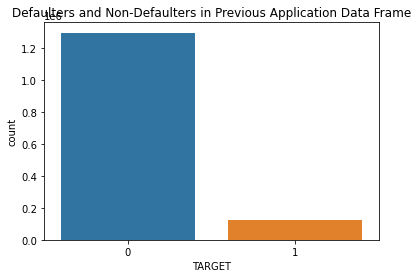

In [63]:
plt.title("Defaulters and Non-Defaulters in Previous Application Data Frame")
sns.countplot(x = "TARGET", data=merge_df)
plt.show()

#### Observations
- TARGET col data is highly imbalanced.
- ~90% customers are Non-Defaulter
- ~10% customers are Non-Defaulter
- The ratio of Non-Defaulters : Defaulters is ~ 9:1. i.e. For every 10 clients there are 9 Non-Defaulters and 1 Defaulter.

## Univariate Analysis of Merge Data Frame variables.
### Numerical Data

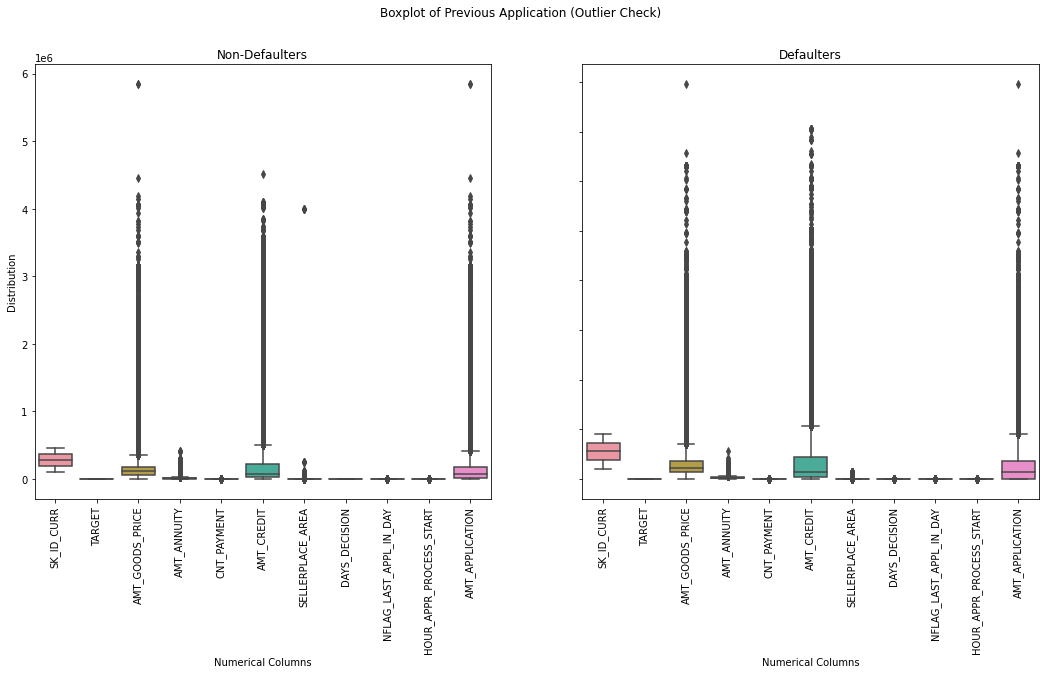

In [64]:
# create figures
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Boxplot of Previous Application (Outlier Check)')

# plot data
g1 = sns.boxplot(data=ND_merge_df, orient='v', ax=ax[0])
g1.set(title='Non-Defaulters')
g1.set(ylabel='Distribution') 
g1.set(xlabel='Numerical Columns') 
ax[0].tick_params(axis='x', rotation=90)



g2 = sns.boxplot(data=D_merge_df, orient='v', ax=ax[1])
g2.set(title='Defaulters')
g2.set(yticklabels=[])  
g2.set(xlabel='Numerical Columns') 
ax[1].tick_params(axis='x', rotation=90)


plt.show()

### Observations
- Outliers are those data points which lie beyond highest value of a given distribution.
- 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY', 'SELLERPLACE_AREA', and 'AMT_APPLICATION' clearly have outliers.
- Boxplots of Defaulters and Non-defaulters reveal some significant difference across numerical columns:-
##### 'AMT_GOODS_PRICE' , 'AMT_CREDIT', 'AMT_APPLICATION' have higher distribution value for Defaulters based on their interquartile size range.
- In EDA we are not neccesearily required to floor or cap the outliers.
- For the columns with vary narrow box plot, they will be plotted individually, to clearly visualise their outliers.
- But if we have to we can create a separate data frame with value only upto 99th Percentile & use that for plotting. As shown in cell below.

In [65]:
#for col in num:
#    ND_merge_df[col] = ND_merge_df[ND_merge_df[col]<np.nanpercentile(ND_merge_df[col], 99)]
#    D_merge_df[col] = D_merge_df[D_merge_df[col]<np.nanpercentile(D_merge_df[col], 99)]

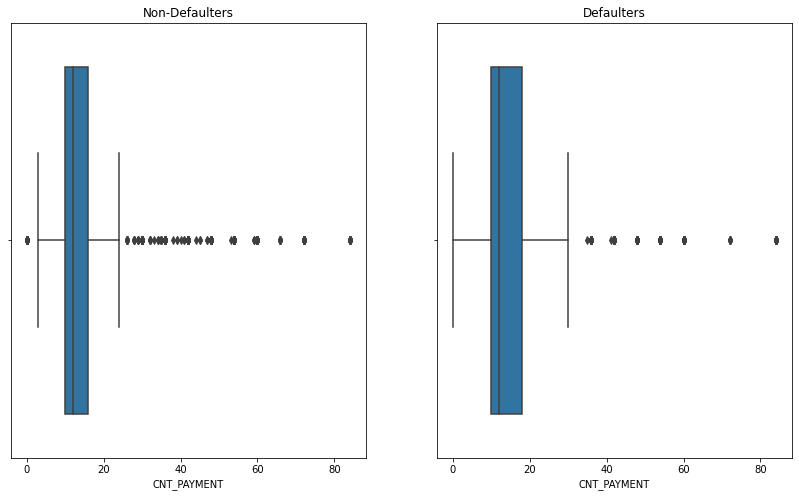

In [66]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_merge_df['CNT_PAYMENT'], ax=ax1)
sns.boxplot(D_merge_df['CNT_PAYMENT'], ax=ax2)
plt.show()

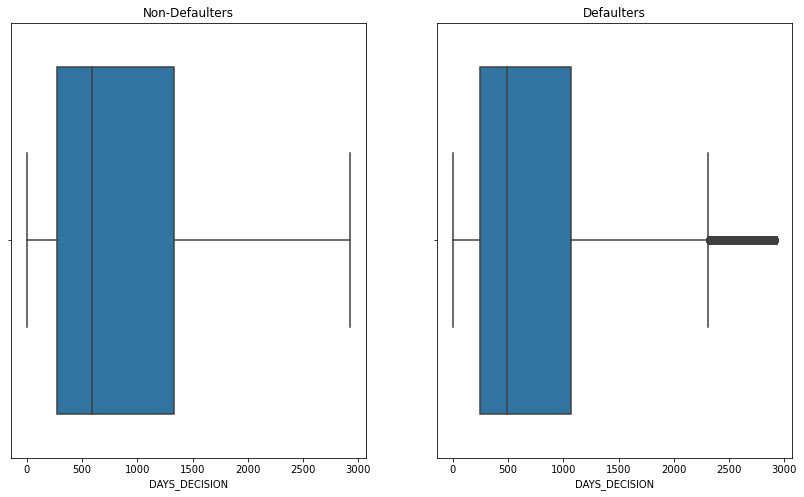

In [67]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_merge_df['DAYS_DECISION'], ax=ax1)
sns.boxplot(D_merge_df['DAYS_DECISION'], ax=ax2)
plt.show()

#### Observation
- Second Inter-quartile range for Non-Defaulters is larger.

In [68]:
merge_n_df['NFLAG_LAST_APPL_IN_DAY'].value_counts(normalize=True)

1.0    0.996441
0.0    0.003559
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

- Data present in 'NFLAG_LAST_APPL_IN_DAY' is like a response variable where flag if the application was the last application per day of the client (Categorical Nominal (Boolean) variable).

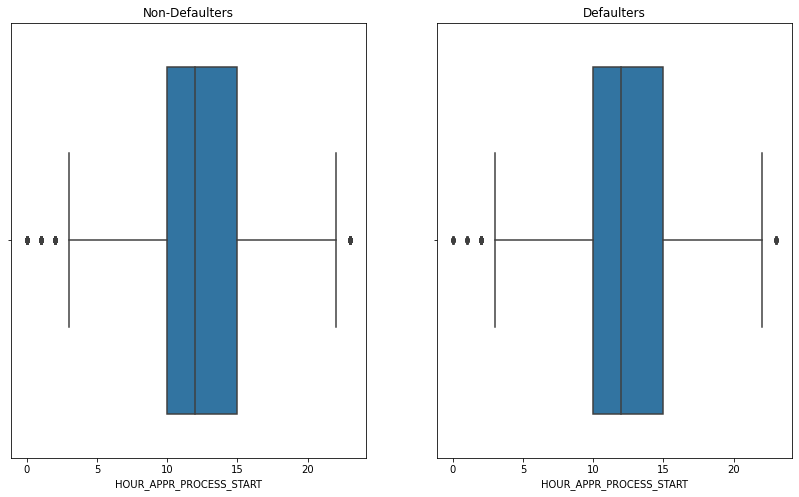

In [69]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_merge_df['HOUR_APPR_PROCESS_START'], ax=ax1)
sns.boxplot(D_merge_df['HOUR_APPR_PROCESS_START'], ax=ax2)
plt.show()

## Univariate Analysis of Previous Application.
### Categorical Data

In [70]:
categorical

['PRODUCT_COMBINATION',
 'NAME_YIELD_GROUP',
 'NAME_PORTFOLIO',
 'NAME_SELLER_INDUSTRY',
 'CHANNEL_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_CLIENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CONTRACT_STATUS',
 'NAME_CASH_LOAN_PURPOSE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_PAYMENT_TYPE']

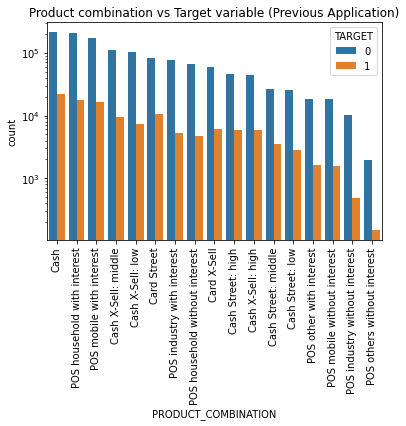

In [71]:
sns.countplot(merge_df['PRODUCT_COMBINATION'], order=merge_df['PRODUCT_COMBINATION'].value_counts().index, hue=merge_df['TARGET'])
plt.title('Product combination vs Target variable (Previous Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [72]:
def DefaultPercentage(xlabel, ylabel, df, title):
    plt.figure(figsize=(6, 6))
    ax = splot=sns.barplot(x= xlabel, y=ylabel, data= df,ci=None)
    for p in splot.patches:
        splot.annotate(str(format(p.get_height()*100, '.1f'))+str( "%"),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

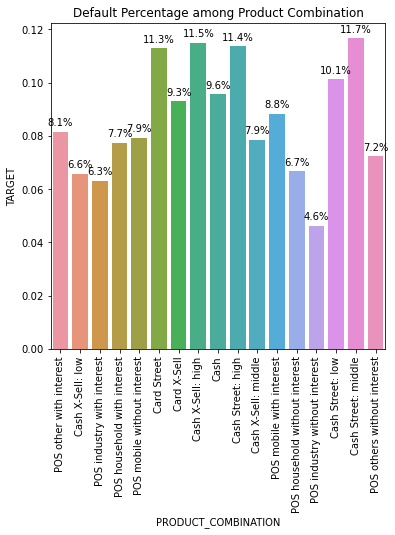

In [73]:
DefaultPercentage(xlabel='PRODUCT_COMBINATION', ylabel='TARGET', df = merge_df, title='Default Percentage among Product Combination')


#### Observations
- 'Cash', 'POS household with interest' product combinations had the highest product combination frequency and 'POS others without interest' had the least frequency.
- Cash Street: Middle has the highest % of Defaulters (11.7%) along with Card Street, Cash X-sell:high and Cash Street:high.

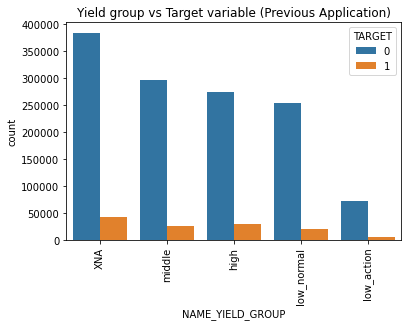

In [74]:
sns.countplot(merge_df['NAME_YIELD_GROUP'], order=merge_df['NAME_YIELD_GROUP'].value_counts().index, hue=merge_df['TARGET'])
#sns.countplot(data = merge_df, y= 'PRODUCT_COMBINATION', order=merge_df['PRODUCT_COMBINATION'].value_counts().index,hue = 'TARGET')
plt.title('Yield group vs Target variable (Previous Application)')
plt.xticks(rotation=90)
plt.show()

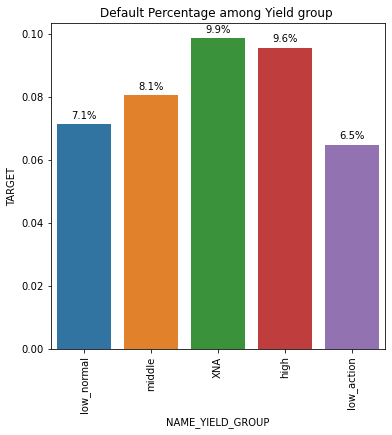

In [75]:
DefaultPercentage(xlabel='NAME_YIELD_GROUP', ylabel='TARGET', df = merge_df, title='Default Percentage among Yield group ')


#### Observations
- XNA is not well defined category, hence we are not commenting on it.
- Yield group with middle intrest rate had highest no. of applications in Previous Application Dataframe.
- Yield group with low_action intrest rate had lowest no. of applications in Previous Application Dataframe.
- High yield group has the highest % of defaulter.

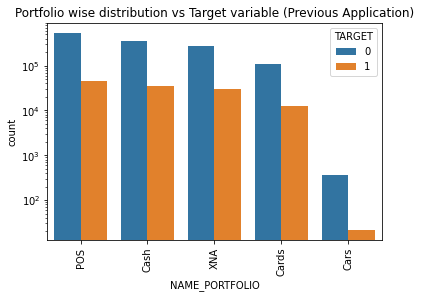

In [76]:
sns.countplot(merge_df['NAME_PORTFOLIO'], hue=merge_df['TARGET'])
plt.title('Portfolio wise distribution vs Target variable (Previous Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

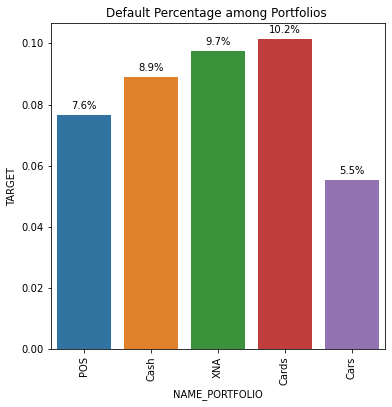

In [77]:
DefaultPercentage(xlabel='NAME_PORTFOLIO', ylabel='TARGET', df = merge_df, title='Default Percentage among Portfolios ')


#### Observations
- Majority of Previous applications were for POS
- Least of them were for Cars.
- Cash portfolio has the highest % of defaulters

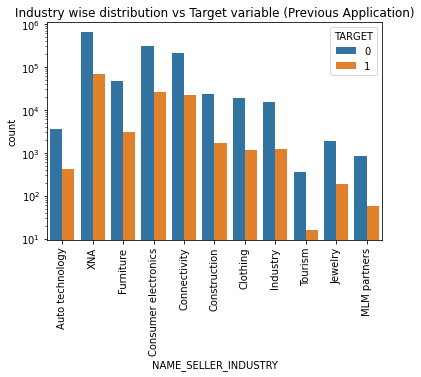

In [78]:
sns.countplot(merge_df['NAME_SELLER_INDUSTRY'], hue=merge_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Industry wise distribution vs Target variable (Previous Application)')
plt.yscale('log')
plt.show()

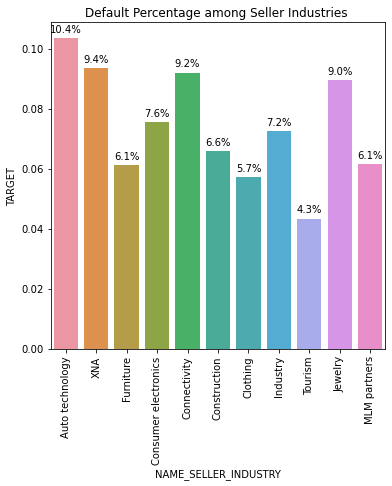

In [79]:
DefaultPercentage(xlabel='NAME_SELLER_INDUSTRY', ylabel='TARGET', df = merge_df, title='Default Percentage among Seller Industries ')


#### Observations
- XNA is not well defined category, hence we are not commenting on it.
- Consumer electronics and Connectivity had the highest no. of applications among Seller Industries.
- Tourism had the least no. of applications among Seller Industries.
- Auto Technology industry observes highest % of Defaulters.

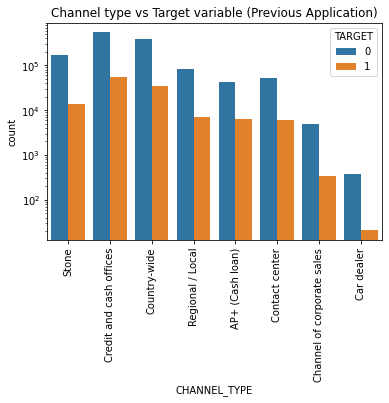

In [80]:
sns.countplot(merge_df['CHANNEL_TYPE'], hue=merge_df['TARGET'])
plt.title('Channel type vs Target variable (Previous Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

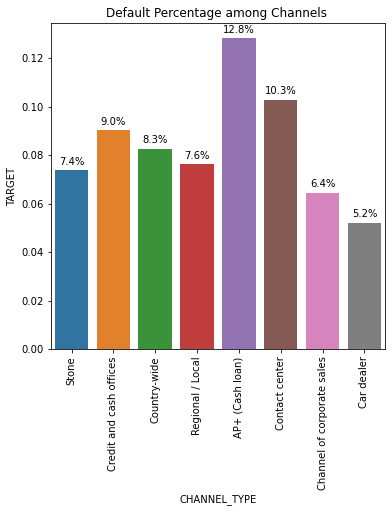

In [81]:
DefaultPercentage(xlabel='CHANNEL_TYPE', ylabel='TARGET', df = merge_df, title='Default Percentage among Channels ')


#### Observations
- Through 'Credit and Cash offices' and 'Country-wide' channels bank acquired the highest no. of clients.
- Car dealers provided with the least no. of clients.
- AP+ (Cash Loans) have the highest %. of Defaulters.

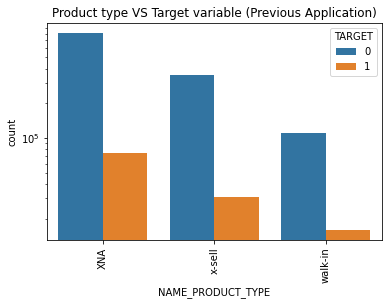

In [82]:
sns.countplot(merge_df['NAME_PRODUCT_TYPE'], hue=merge_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Product type VS Target variable (Previous Application)')
plt.yscale('log')
plt.show()

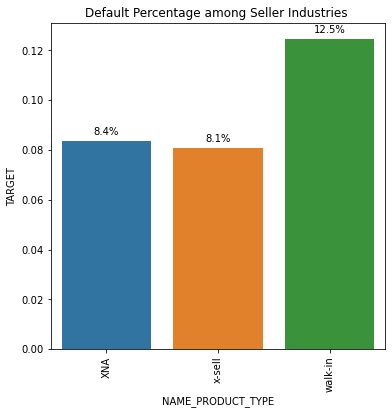

In [83]:
DefaultPercentage(xlabel='NAME_PRODUCT_TYPE', ylabel='TARGET', df = merge_df, title='Default Percentage among Seller Industries ')


#### Observations
- XNA is not well defined category, hence we are not commenting on it.
- Majority of Previous Applications were X-sell.
- Highest % of Defaulters observed in Walk-in.

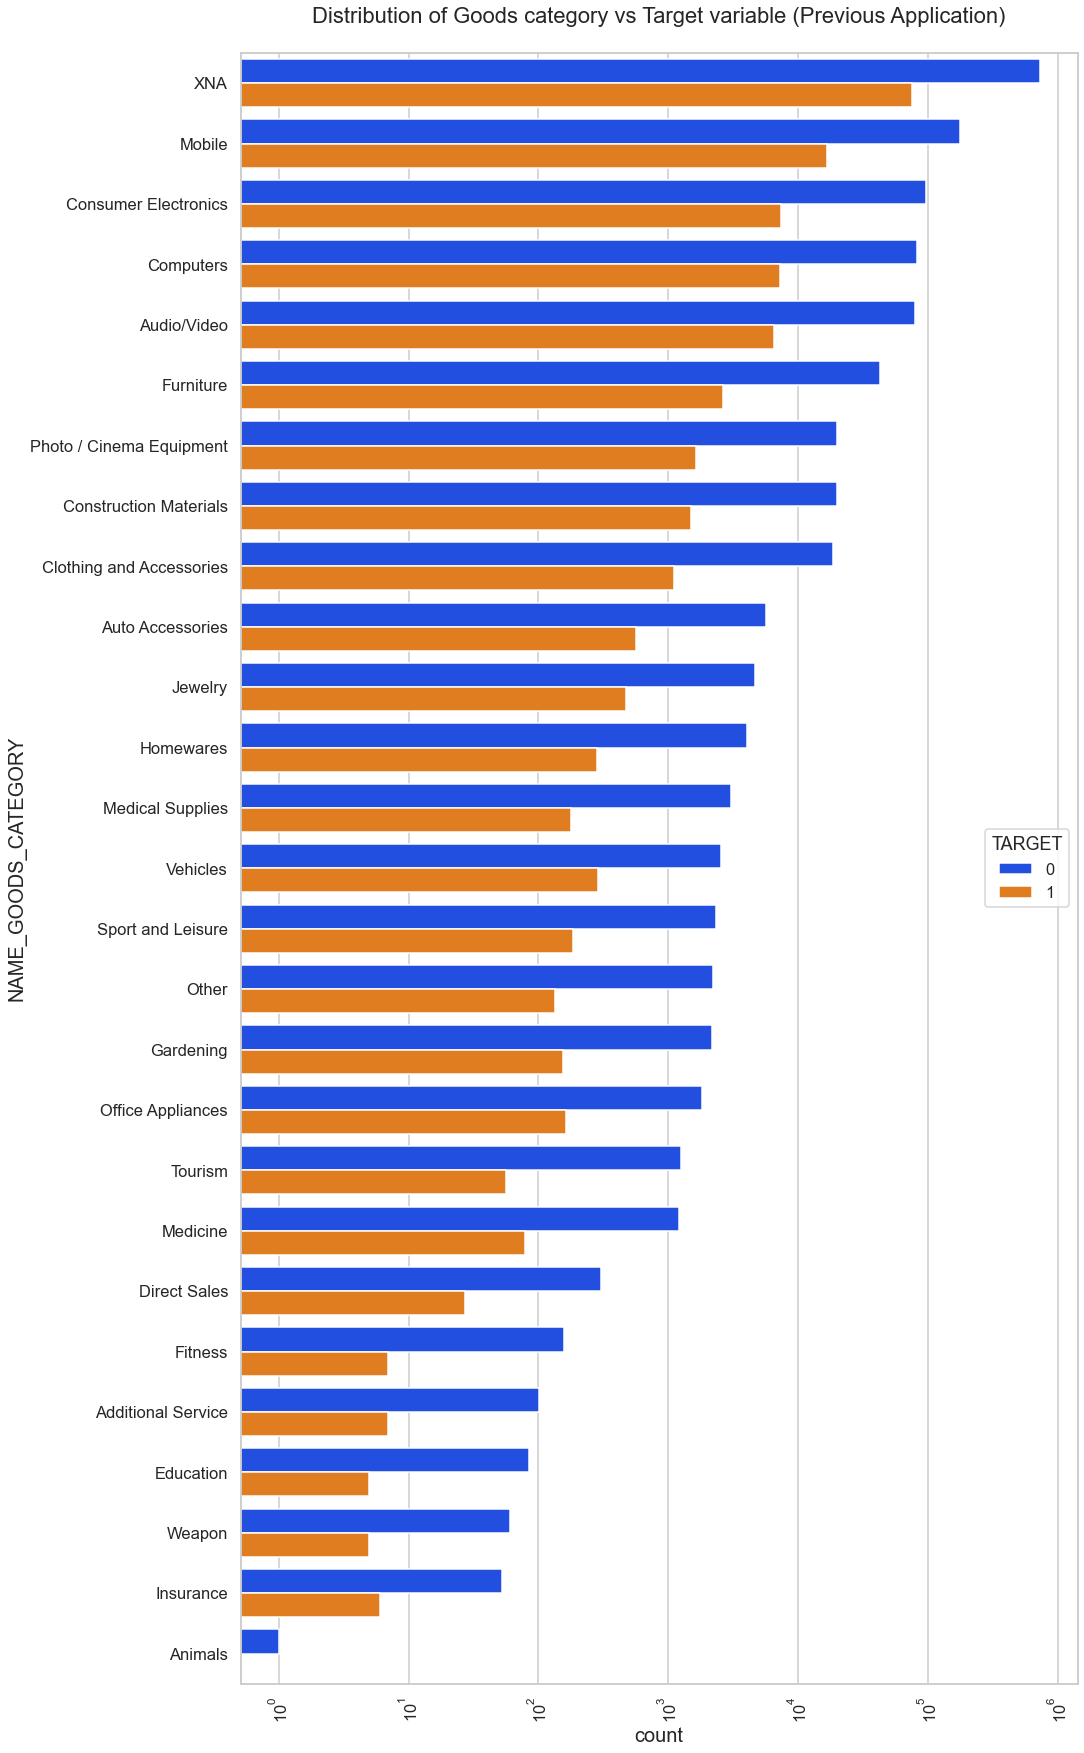

In [84]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Goods category vs Target variable (Previous Application)')
ax = sns.countplot(data = merge_df, y= 'NAME_GOODS_CATEGORY',order=merge_df['NAME_GOODS_CATEGORY'].value_counts().\
                   index,hue = 'TARGET', palette='bright') 

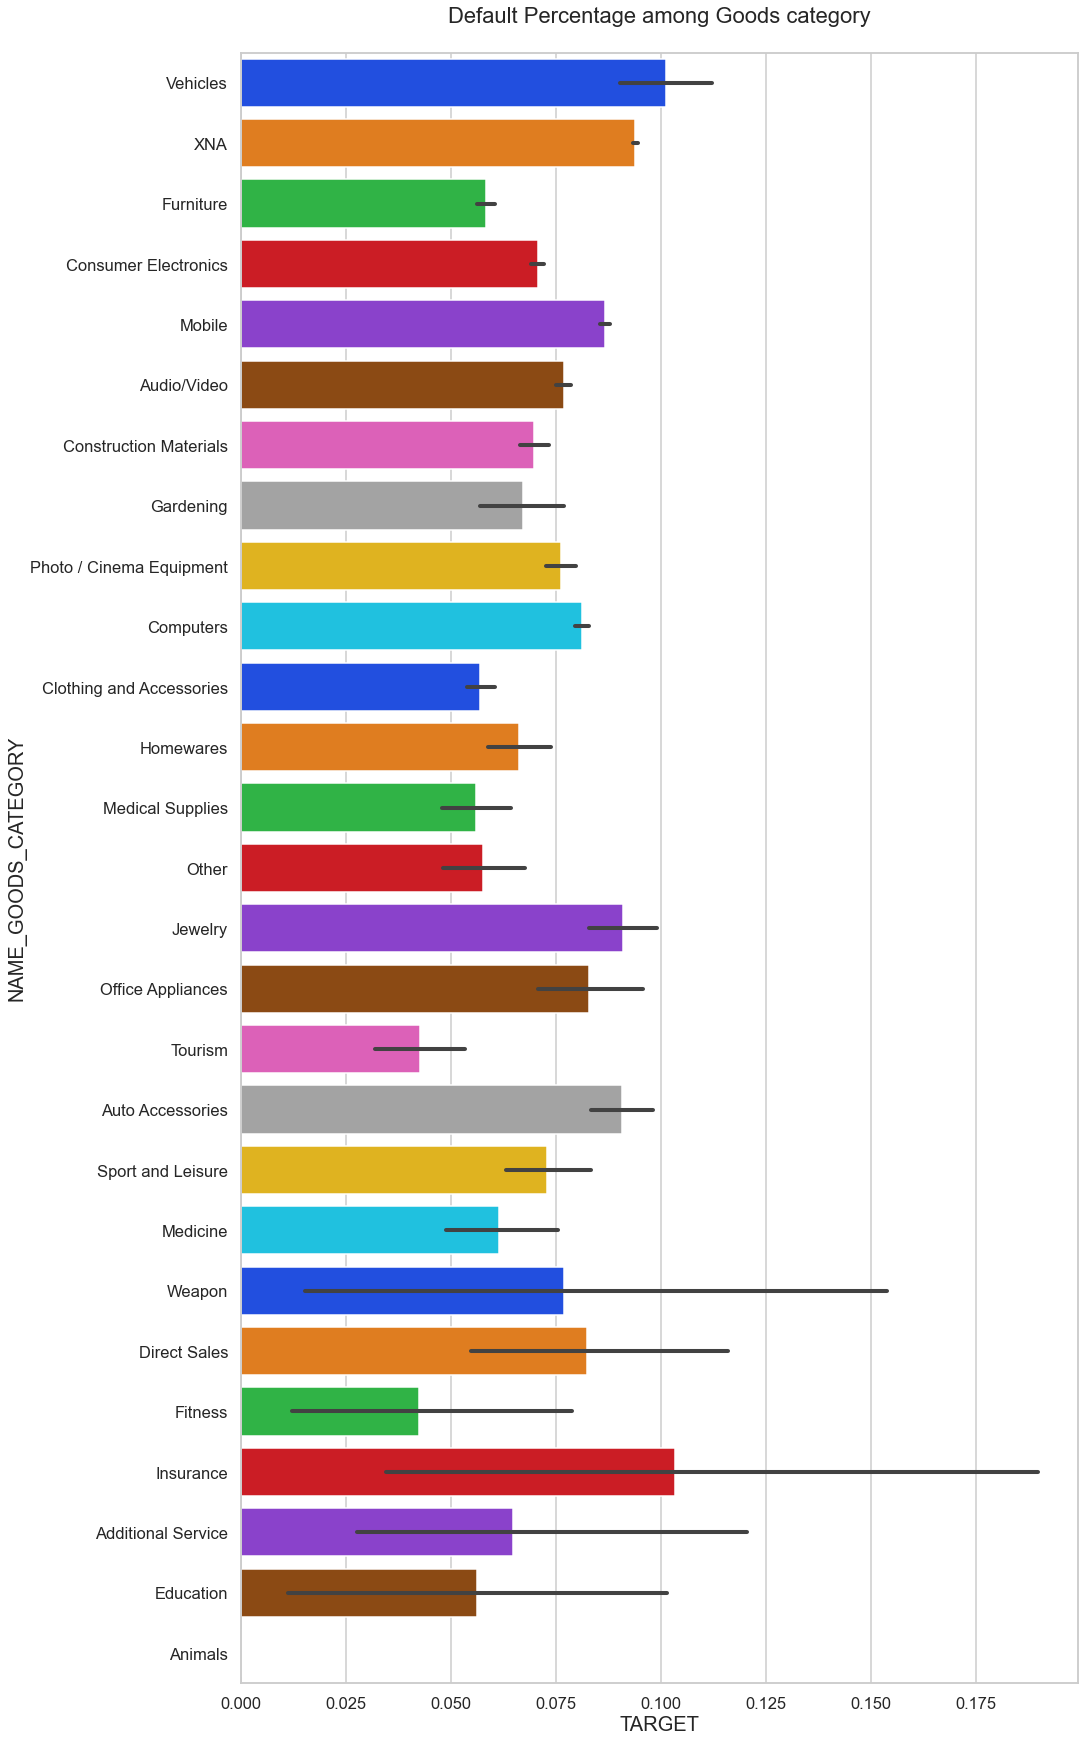

In [85]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Default Percentage among Goods category')
ax =splot= sns.barplot(data = merge_df, y= 'NAME_GOODS_CATEGORY', x= 'TARGET', palette='bright')


#### Observations
- XNA is not well defined category, hence we are not commenting on it.
- Majority of clients applied for loans for Mobiles in Previous application.
- Very few people applied for loans for Animals of clients in Previous application.
- Among all goods category, Highest % of Defaulters are found in Insurance followed by Vehicles.

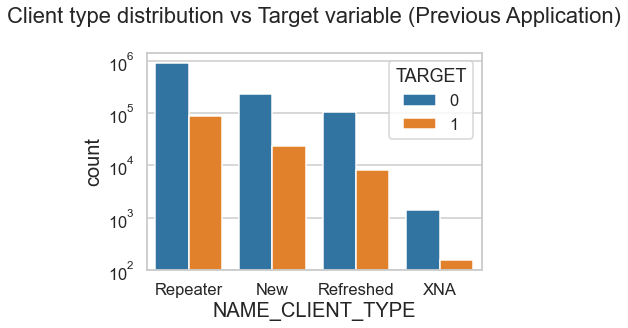

In [86]:
sns.countplot(merge_df['NAME_CLIENT_TYPE'], order =merge_df['NAME_CLIENT_TYPE'].value_counts().index, hue=merge_df['TARGET'])
plt.title('Client type distribution vs Target variable (Previous Application)')
plt.yscale('log')
plt.show()

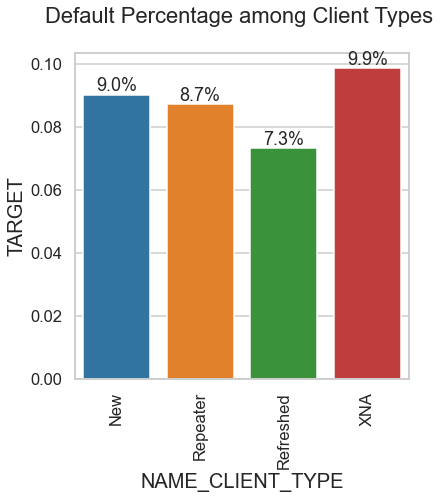

In [87]:
DefaultPercentage(xlabel='NAME_CLIENT_TYPE', ylabel='TARGET', df = merge_df, title='Default Percentage among Client Types ')

#### Observations
- Most of the clients were Repeaters.
- Among all goods client type, Highest % of Defaulters are found in Insurance followed by Vehicles.
- Highest Default % among New clients.

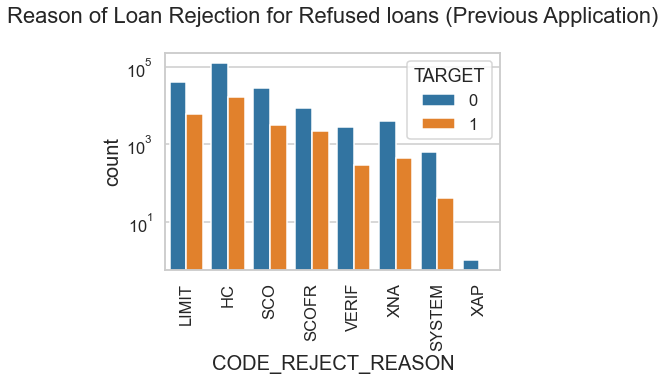

In [88]:
sns.countplot(merge_df[merge_df['NAME_CONTRACT_STATUS']=='Refused']['CODE_REJECT_REASON'], hue=merge_df['TARGET'])
plt.title('Reason of Loan Rejection for Refused loans (Previous Application)')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

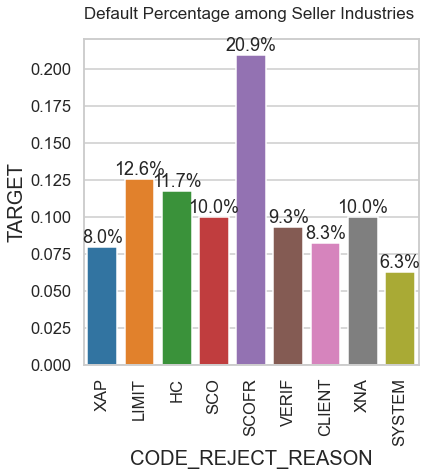

In [89]:
DefaultPercentage(xlabel='CODE_REJECT_REASON', ylabel='TARGET', df = merge_df, title='Default Percentage among Seller Industries ')


#### Observations
- Among Individuals whose loans were refused, majority of them were of 'HC' and 'LIMIT' rejects.
- In general, whose loans were rejected, majority of the defaulters (~21%) had 'SCOFR' as the reject code.

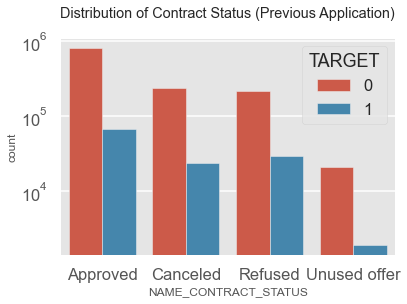

In [90]:
plt.style.use('ggplot')
plt.title('Distribution of Contract Status (Previous Application)')
plt.yscale('log')
sns.countplot(merge_df['NAME_CONTRACT_STATUS'], hue=merge_df['TARGET'])
plt.show()

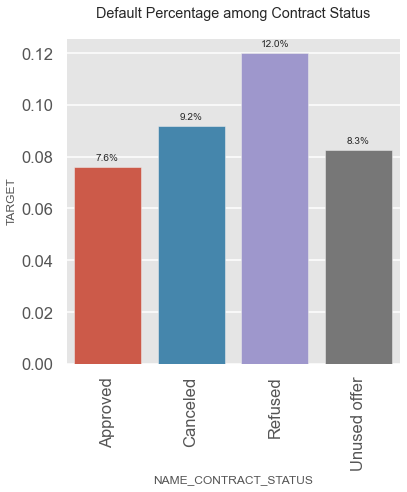

In [91]:
DefaultPercentage(xlabel='NAME_CONTRACT_STATUS', ylabel='TARGET', df = merge_df, title='Default Percentage among Contract Status')

#### Observations
- Clearly those customers who had received loan approval in their Previous Application have the highest no. of Non-Defaulters and highest ratio of Non-Defaulters:Defaulters. But there are also some customers who defaulted, so based on their previous application status they were falsely considered as Non-Defaulters; i.e. Type 2 error, False Negative.
- But there are few cases where in the customers whose previous loan application was refused but were actually Non-Defaulters in there current loan application. This is an indicative of Type 1 error; i.e. False Positive.
- Highest % of Defaulters were those whose Previous Loans were refused.

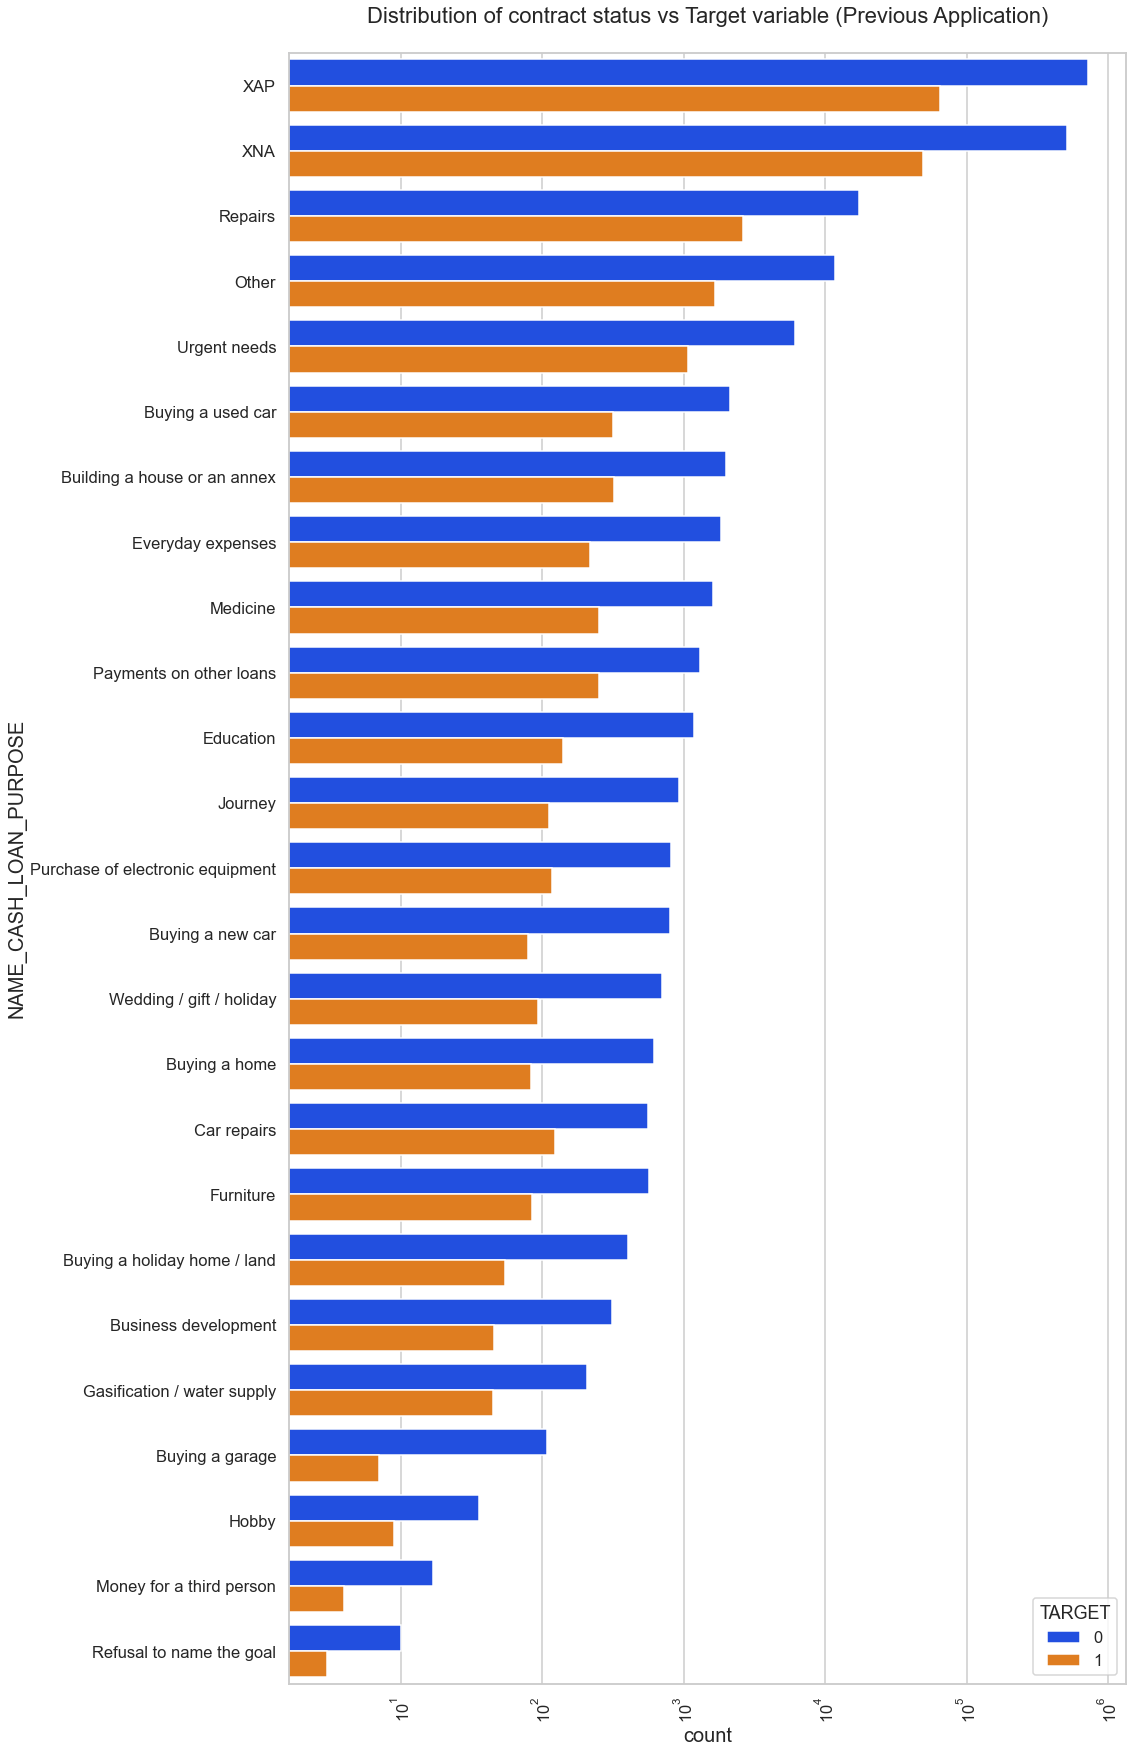

In [92]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status vs Target variable (Previous Application)')
ax = sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET', palette='bright') 

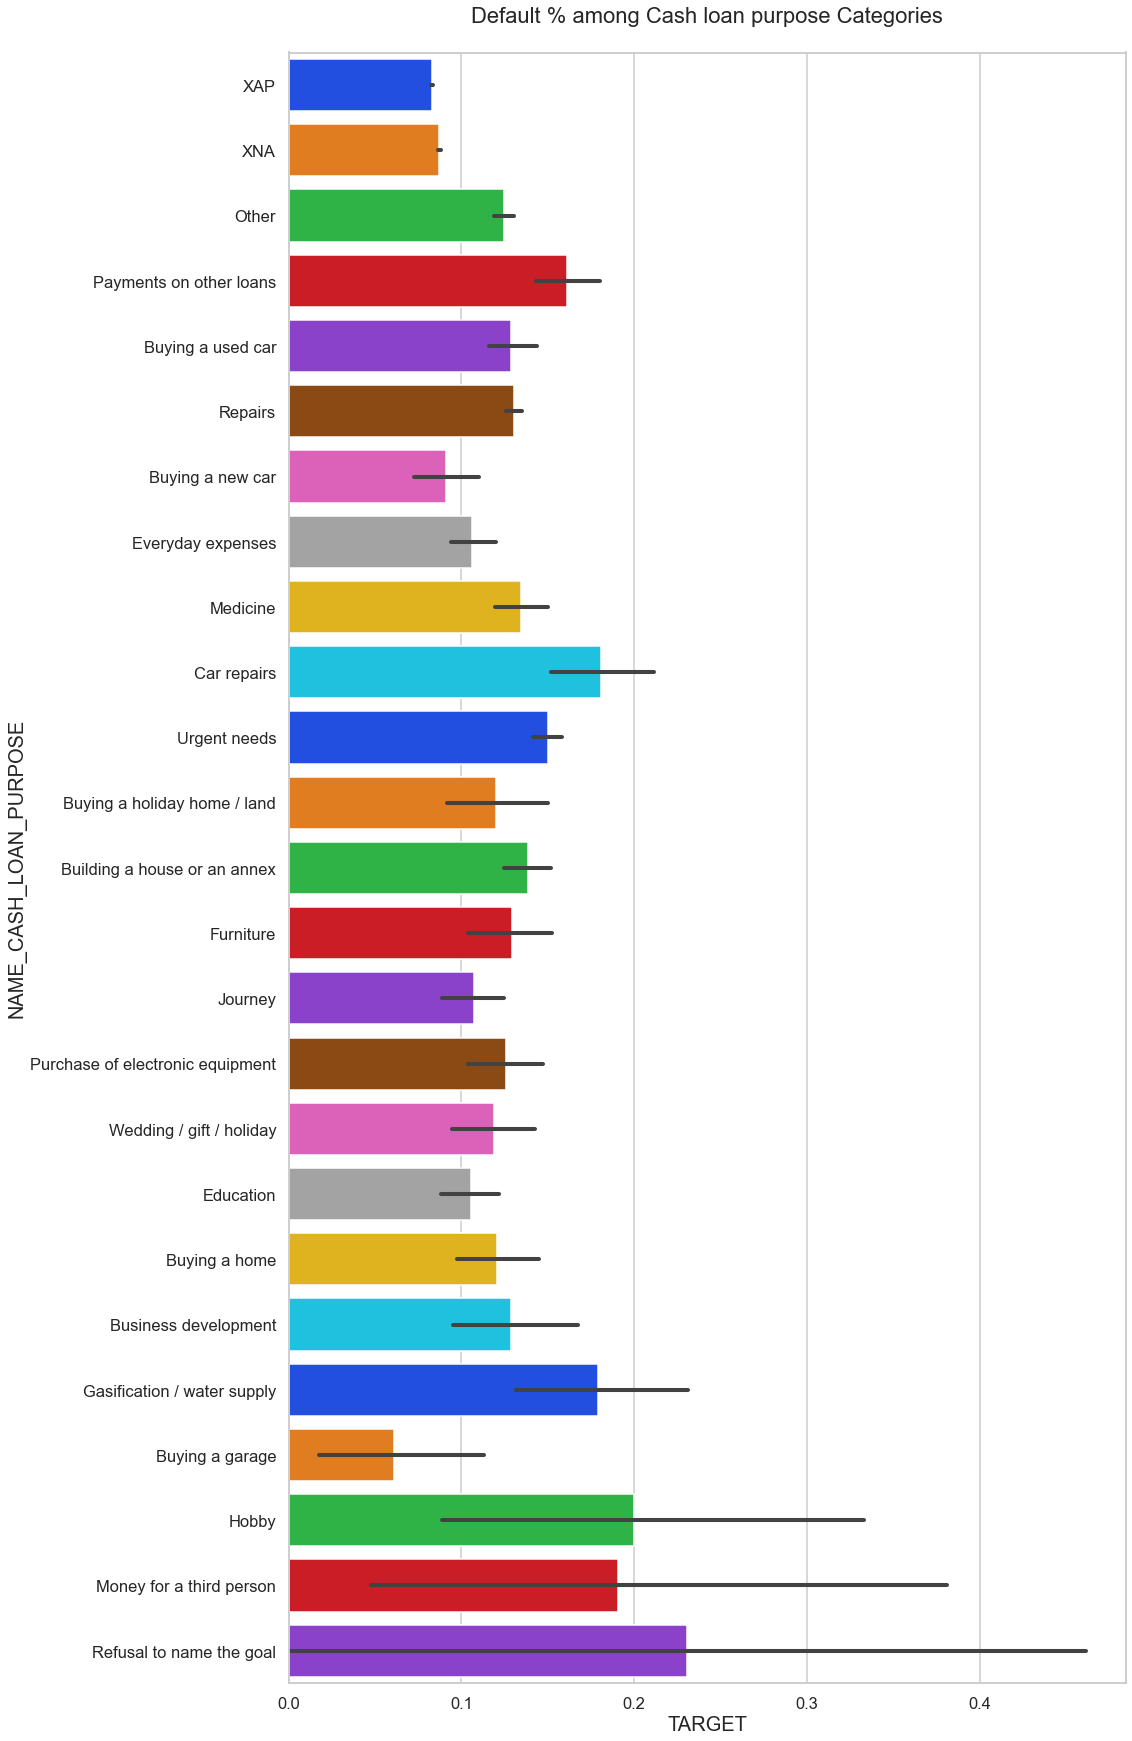

In [93]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Default % among Cash loan purpose Categories')
ax =splot= sns.barplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', x= 'TARGET', palette='bright')

#### Observations
- Among those who applied for Cash loans, most applied for repair purposes.
- Least no. of clients received cash loans when they refused to name their goal/purpose.
- Highest % default observed for those who applied for cash loan for purposes they refused to declare followed by Money for Third person and Hobby.

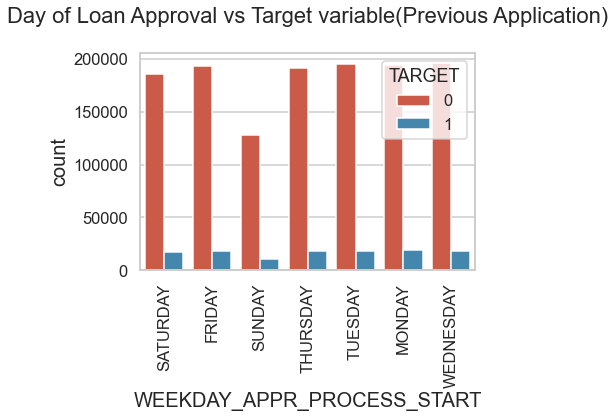

In [94]:
sns.countplot(merge_df['WEEKDAY_APPR_PROCESS_START'], hue=merge_df['TARGET'])
plt.title('Day of Loan Approval vs Target variable(Previous Application)')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

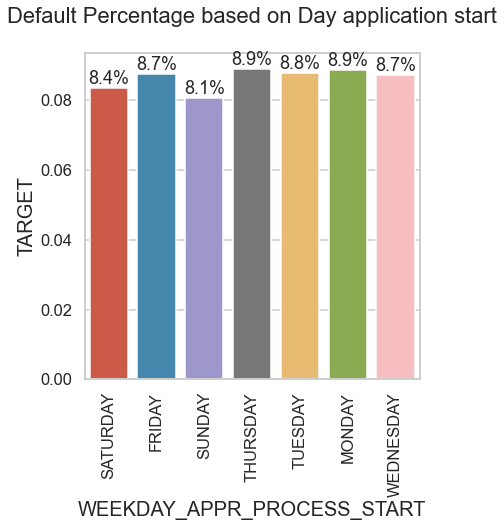

In [95]:
DefaultPercentage(xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='TARGET', df = merge_df, title='Default Percentage based on Day application start')

#### Observations
- Sunday observed least no. of applications.
- It is odd, because on Sunday, Banks are closed. 
- Rest of the weekdays observed more-or-less same no. of applications.
- Default % is very similar across all days.

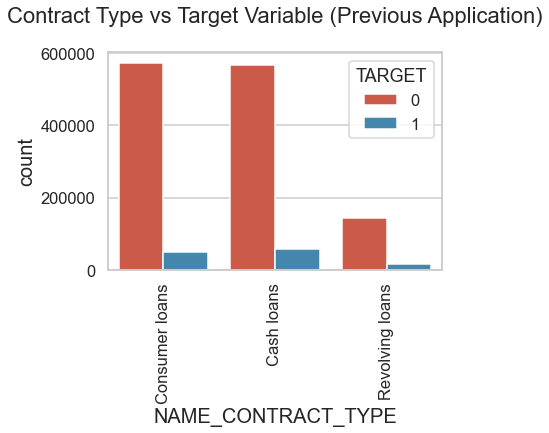

In [96]:
sns.countplot(merge_df['NAME_CONTRACT_TYPE'], hue=merge_df['TARGET'])
plt.title('Contract Type vs Target Variable (Previous Application)')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.show()

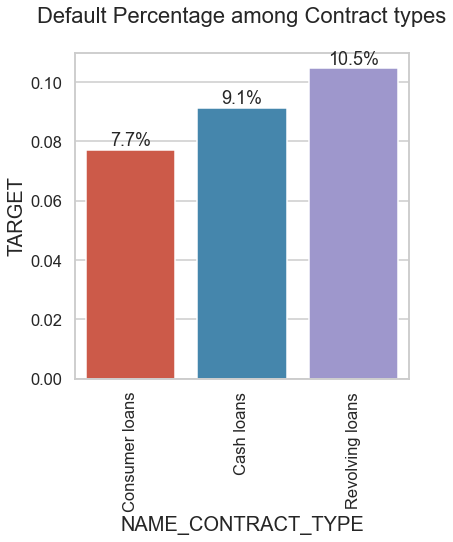

In [97]:
DefaultPercentage(xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET', df = merge_df, title='Default Percentage among Contract types')

#### Observations
- Most loans were of 'Consumer loans' and 'Cash loans' contract type.
- 'Revolving Loans' were least applied for.
- Highest % Default observed for Revolving loans.

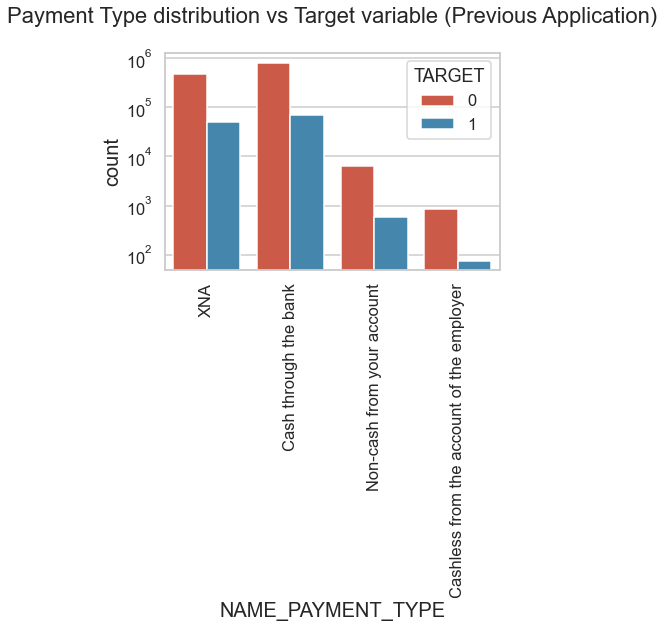

In [98]:
sns.countplot(merge_df['NAME_PAYMENT_TYPE'], hue=merge_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Payment Type distribution vs Target variable (Previous Application)')
plt.yscale('log')
plt.show()

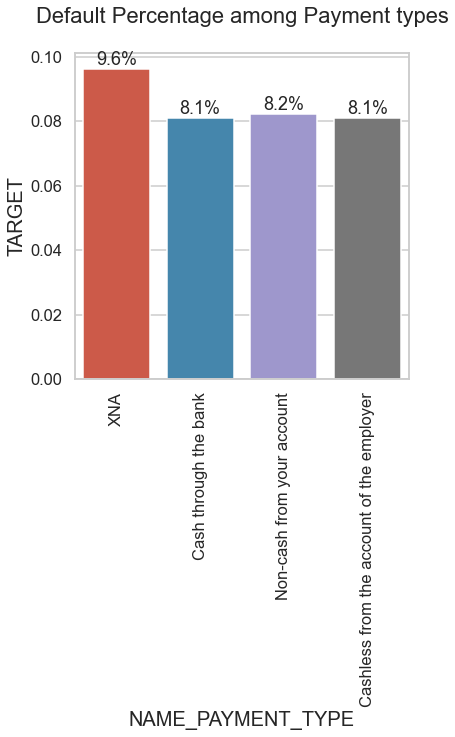

In [99]:
DefaultPercentage(xlabel='NAME_PAYMENT_TYPE', ylabel='TARGET', df = merge_df, title='Default Percentage among Payment types')

#### Observations
- XNA is not well defined category, hence we are not commenting on it.
- Majority of Clients chose to pay back loans to bank via 'Cash through the bank'
- Very few chose to pay through 'Cashless from the account of the employer'.
- Default % is very similar across all payment categories.

## Bivariate and Multivariate Analysis of Previous Application Data Frame

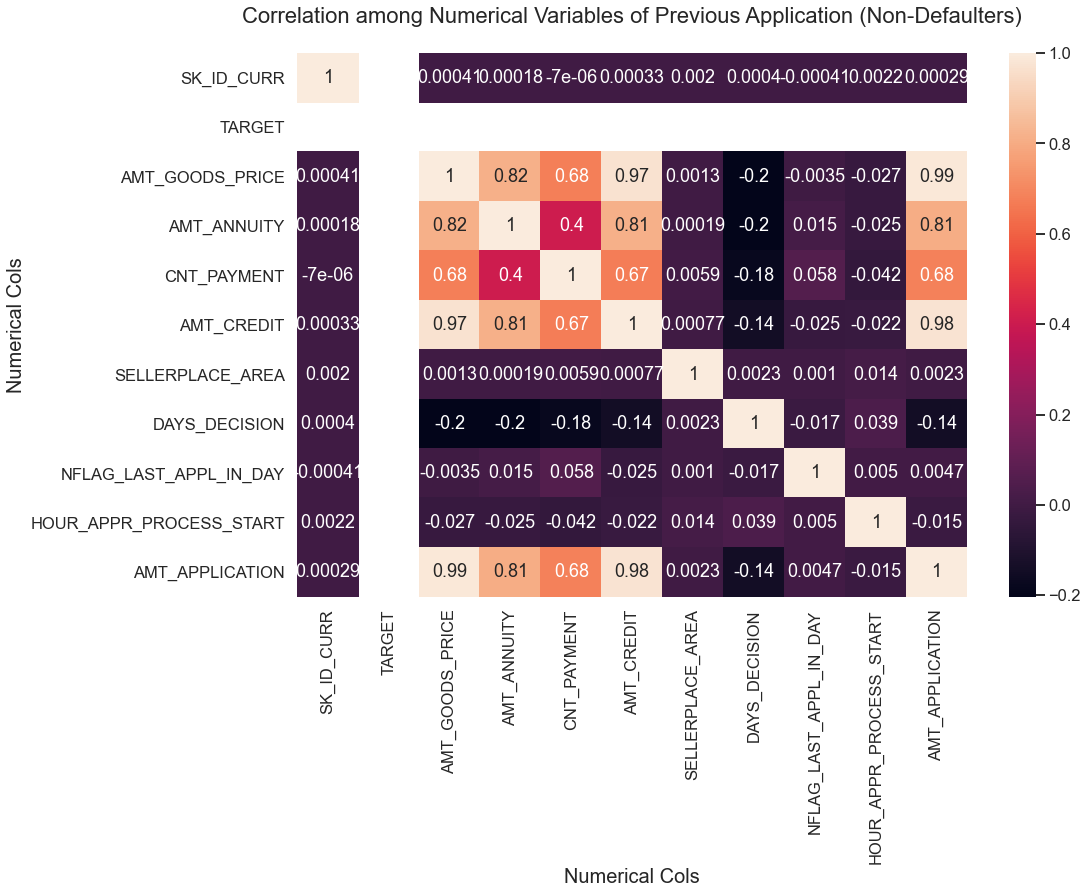

In [100]:
#Correlation between numerical columns of merged Data.
plt.figure(figsize=(15,10))
sns.heatmap(ND_merge_df.corr(), annot=True)
plt.title('Correlation among Numerical Variables of Previous Application (Non-Defaulters)')
plt.xlabel('Numerical Cols')
plt.ylabel('Numerical Cols')
plt.show()

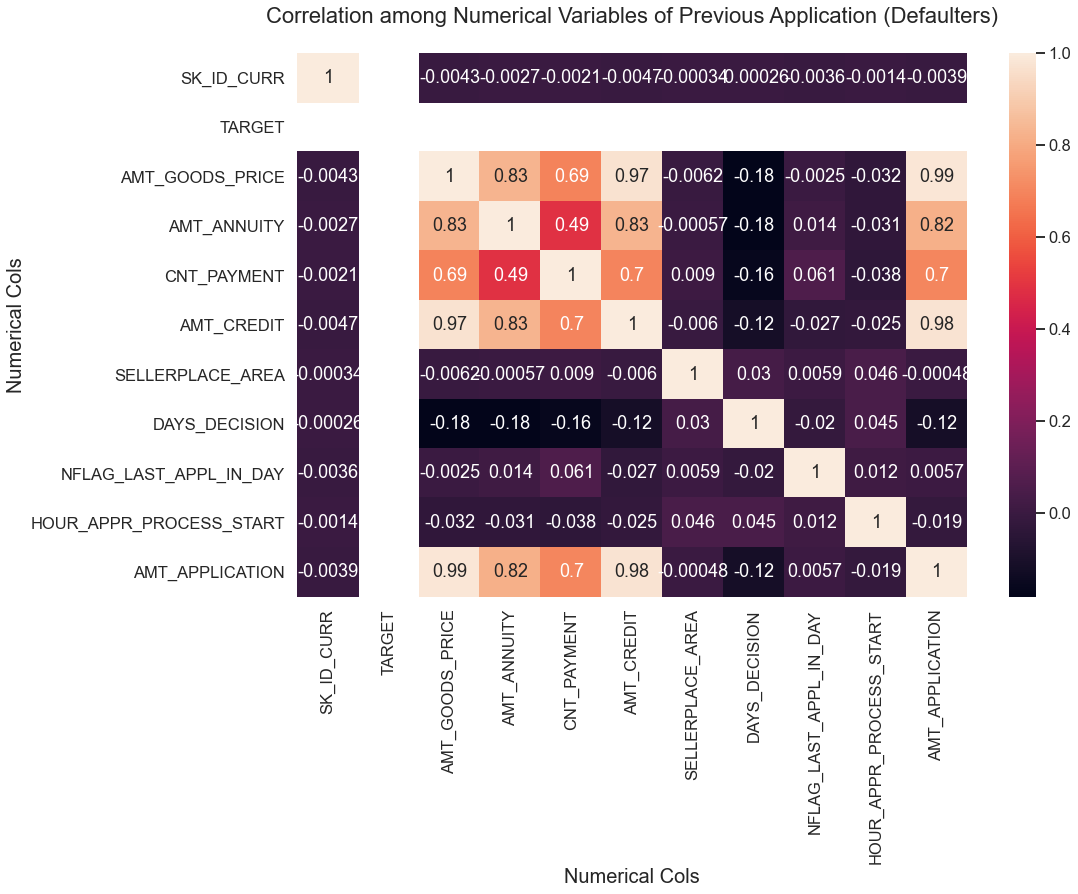

In [101]:
#Correlation between numerical columns of merged Data.
plt.figure(figsize=(15,10))
sns.heatmap(D_merge_df.corr(), annot=True)
plt.title('Correlation among Numerical Variables of Previous Application (Defaulters)')
plt.xlabel('Numerical Cols')
plt.ylabel('Numerical Cols')
plt.show()

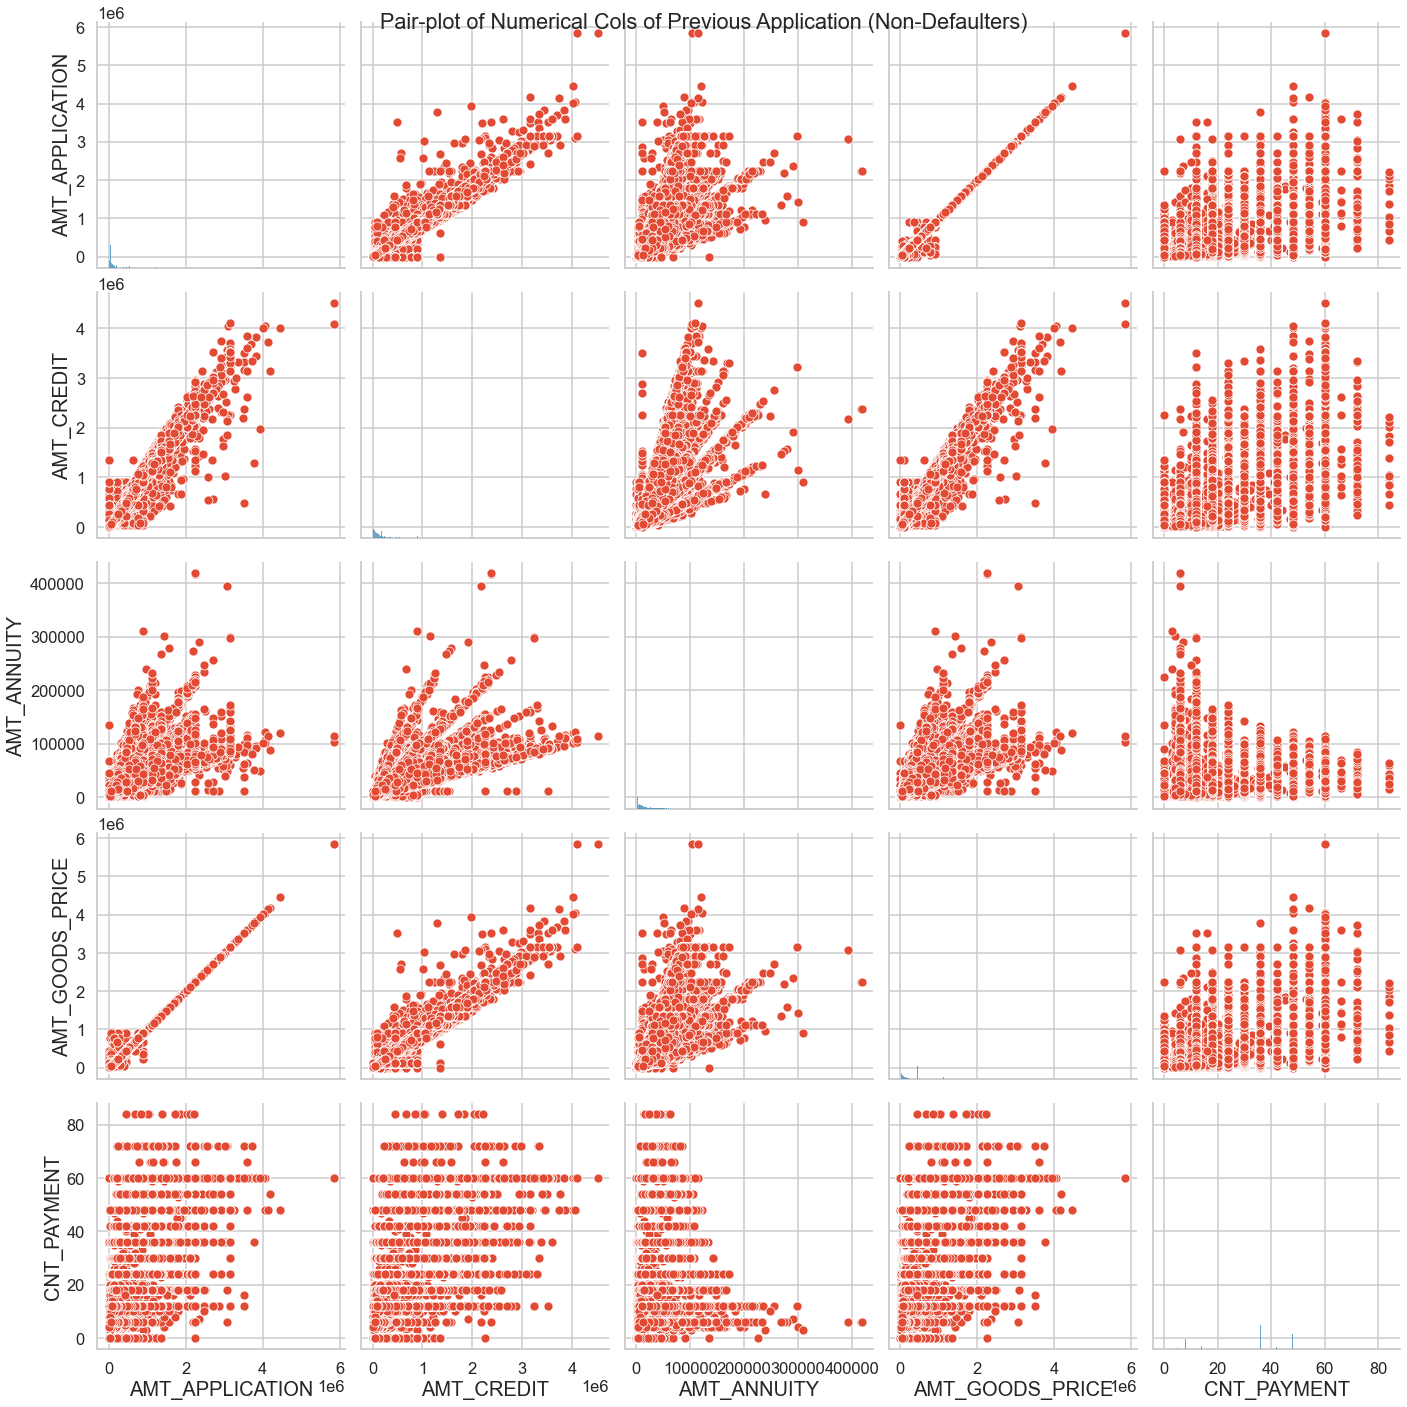

In [102]:
#Numerical cols with high correlation are visualised in more detail using pair-plot.
sns.pairplot(data=ND_merge_df, vars=['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'], height=4)
plt.suptitle('Pair-plot of Numerical Cols of Previous Application (Non-Defaulters)')
plt.show()

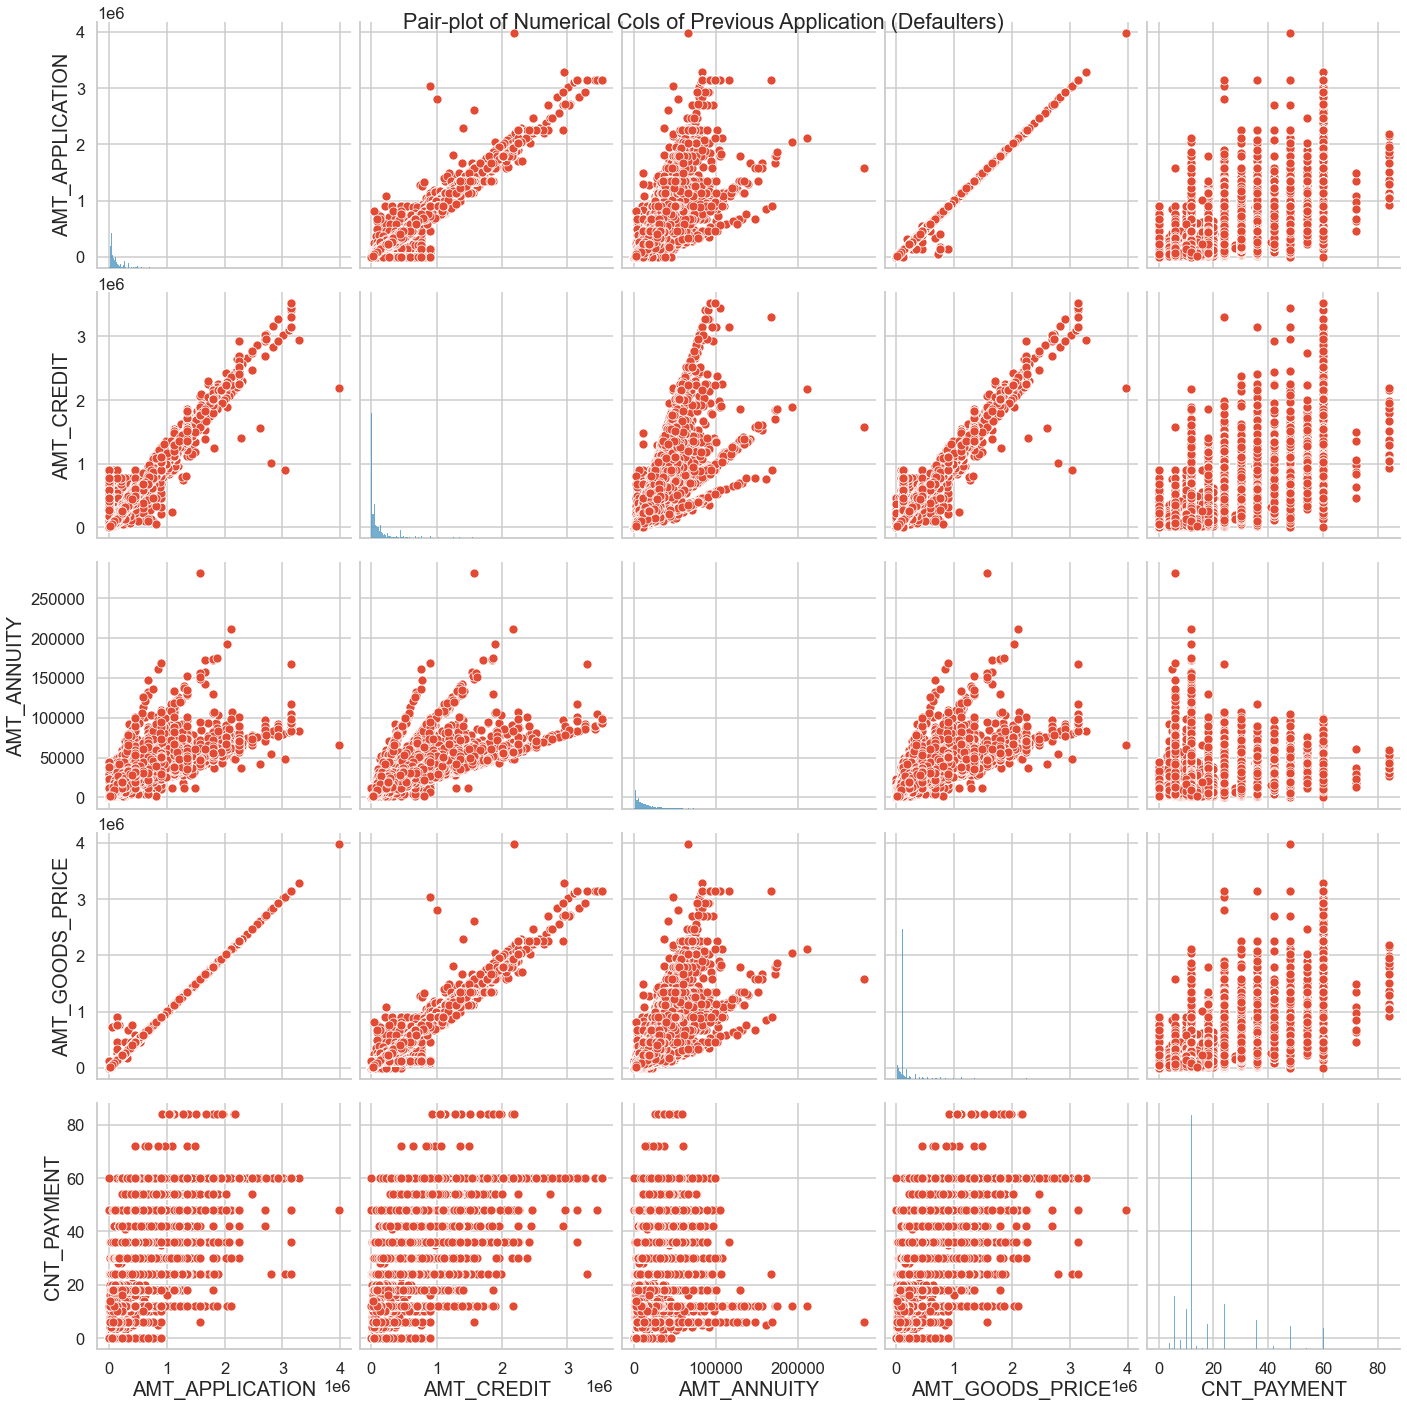

In [103]:
#Numerical cols with high correlation are visualised in more detail using pair-plot.
sns.pairplot(data=D_merge_df, vars=['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'], height=4)
plt.suptitle('Pair-plot of Numerical Cols of Previous Application (Defaulters)')
plt.show()

#### Observations
- 'AMT_APPLICATION' is directly correlated with 'AMT_CREDIT', 'AMT_GOODS_PRICE' and highly correlated to 'AMT_ANNUITY', 'CNT_PAYMENT.
- 'CNT_PAYMENT' is equally (moderately) correlated to 'AMT_GOODS_PRICE', 'AMT_CREDIT' and 'AMT_APPLICATION'.
- Bivariate Analysis of Numerical variables dont show any significant different trends among Non-Defaulter and Defaulters.

##### Multivariate analysis is utilised to identify, different trends between Defaulters and Non-Defaulters via use of both Categorical and Numerical variables.

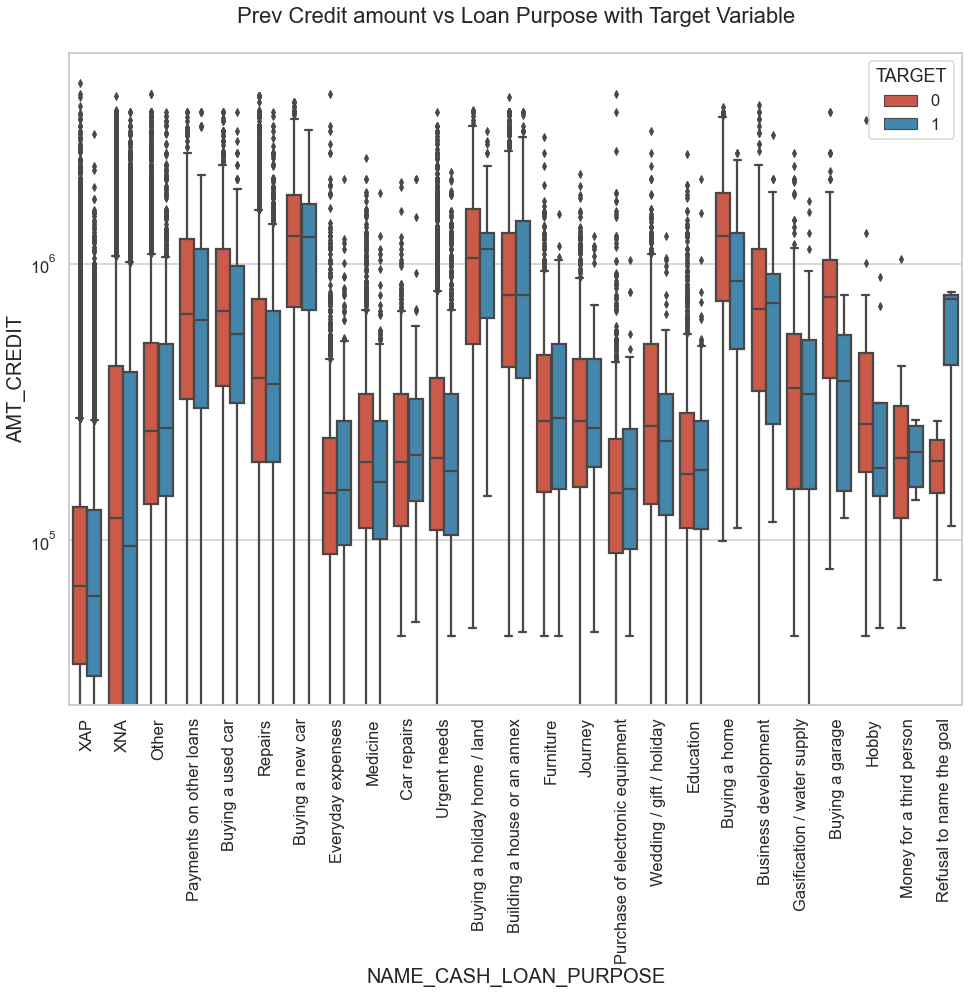

In [104]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = merge_df, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',y='AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose with Target Variable')
plt.show()

#### Observations
- Highest credit amount was received for 'Buying a new car' and 'Buying New Home' among Cash loans.
- Lowest credit amount was received for 'Purchase of electronic equipment' and 'Everyday Expenses'.
- Everyday expenses, building house or annex, purchase of electronic equipment and Furniture show slighlty higher Credit amount received for cash loan purpose for Defaulters compared to non-defaulters.

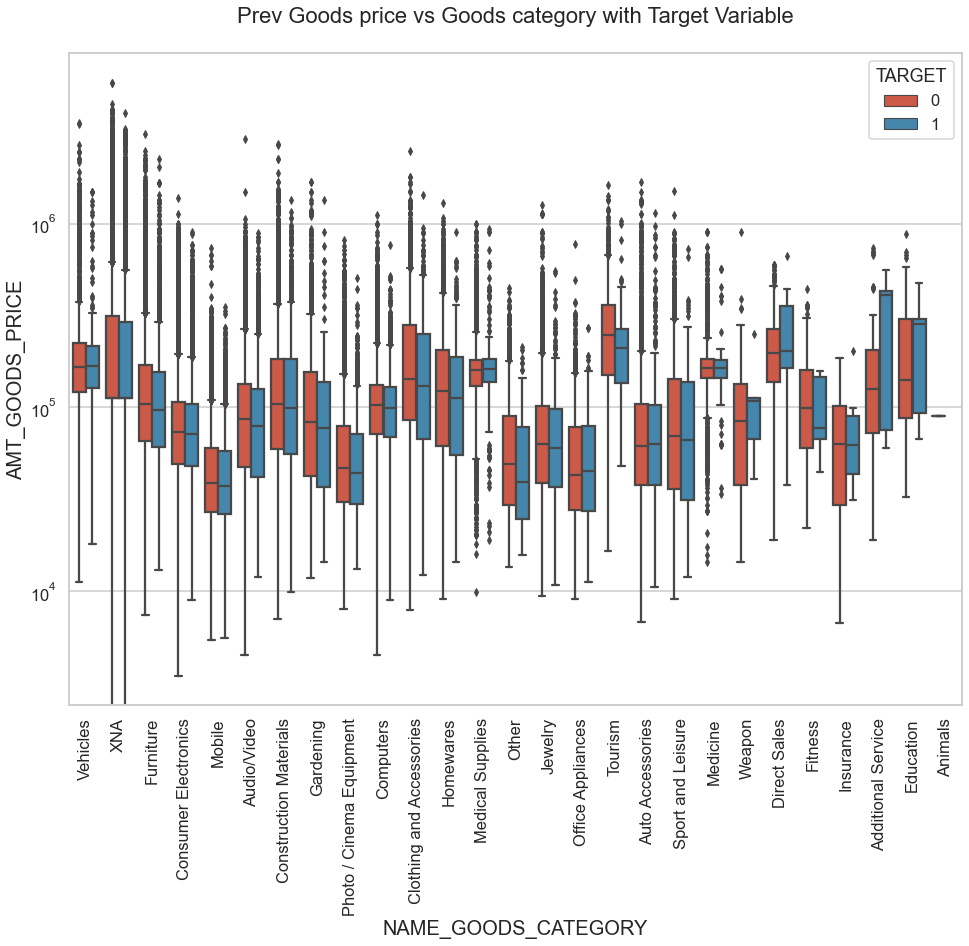

In [105]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = merge_df, x='NAME_GOODS_CATEGORY',hue='TARGET',y='AMT_GOODS_PRICE',orient='v')
plt.title('Prev Goods price vs Goods category with Target Variable')
plt.show()

#### Observations
- Among category of goods, highest Goods price for which loan was granted was for 'Tourism'.
- Among Goods categories, Defaulters received loans for higher goods amounts for 'Direct Sales', 'Additional Service' and 'Education'.

# Conclusions of Previous Application Data Frame
- There were 15 Categorical columns and 9 Numerical columns.
- There were 1420436 clients.
- The data was higjly imbalanced, ~90% were Non-Defaulters and ~10% were Defaulters.
- 'NAME_CONTRACT_STATUS' is an important variable, majority of clients whose previous loan was approved were Non-defaulters, but intrestingly many people who were refused loan in previous application were Non-Defaulters. Bank should also focus on it's policies to avoid Type I error i.e. False Positive- Wrongly considering a cllient as Defaulter.
- Boxplots of Defaulters and Non-defaulters reveal some significant difference across numerical columns:-
##### 'AMT_GOODS_PRICE' , 'AMT_CREDIT', 'AMT_APPLICATION' have higher distribution value for Defaulters based on their interquartile size range.
- Segmented Univariate Analysis of Categorical variables showed most opted sub-category within that variable via count plot and Default % bar plot showed the sub-category with highest default %.
##### Examples:-(with significant Default %)
- Cash loan Purpose -1) Refusal to give reason, 2) Money for third Person, 3) Hobby; all ~20%, such loans should be given at higher intrest rate or lower credit amount or simply refused. 
- Remaining Default % are within range of 7%~12%, for such sub-categories, those with highest Default% should be given loan at higher intrest rate or lower credit amount.
#### Multivariate Analyses helped us reveal peculiar characteristics of Defaulters.
- Multivariate Analyses revealed that some Numerical columns are highly correlated, i.e.
- 'AMT_APPLICATION' is directly correlated with 'AMT_CREDIT', 'AMT_GOODS_PRICE' and highly correlated to 'AMT_ANNUITY', 'CNT_PAYMENT.
- 'CNT_PAYMENT' is equally (moderately) correlated to 'AMT_GOODS_PRICE', 'AMT_CREDIT' and 'AMT_APPLICATION'.
##### There are few goods categories where Defaulters  received loans for higher price for same goods than Non-Defaulters; i.e. 'Additional Service' and 'Direct Sales'- based on IQR and also 'Education'- based on Median value
- This gives us an idea on how to treat the client asking for higher credit amount than others, i.e. possible Defaulter.
##### Among Goods categories, clients who  received loans for higher goods amounts for 'Direct Sales', 'Additional Service' and 'Education' were Defaulters.

# Analysis of Variables in Application Data Frame

In [106]:
#Filtered Application data frame after Data Cleaning
app_df_filt.head()

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0        Laborers      0.139376                         0.0   
1      Core staff      0.535276                         0.0   
2        Laborers      0.729567                         0.0   
3        Laborers      0.535276                         0.0   
4      Core staff      0.535276                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                         1.0   Unaccompanied                       2.0   
1                         0.0          Family                       1.0   
2                         0.0   Unaccompanied                       0.0   
3                         0.0   Unaccompanied                       2.0   
4                         0.0   Unaccompanied                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  \
0                       2.0      0.262949         351000.0      24700.5   
1                       0.0      0.622246        1129500.0      35698.5   
2                       0.0      0.555912         135000.0       6750.0   
3                       0.0      0.650442         297000.0      29686.5   
4                       0.0      0.322738         513000.0      21865.5   

   CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  CNT_CHILDREN  FLAG_DOCUMENT_8  \
0              1.0                  1134.0             0                0   
1              2.0                   828.0             0                0   
2              1.0                   815.0             0                0   
3              2.0                   617.0             0                0   
4              1.0                  1106.0             0                1   

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  FLAG_DOCUMENT_2  \
0         Cash loans           M            N                0   
1         Cash loans           F            N                0   
2    Revolving loans           M            Y                0   
3         Cash loans           F            N                0   
4         Cash loans           M            N                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_9  FLAG_DOCUMENT_21  FLAG_DOCUMENT_10  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0          

In [107]:
#Rows and cols of Application Data Frame
app_df_filt.shape

(304531, 73)

In [108]:
#Rows and clos of Previous Application Data Frame
prev_app_df_filt.shape

(1669867, 26)

##### Observations
- There are 304531 rows (clients) and 73 Cols (Variables/Features).
- Comapared to Previous Application the number of Clients are considerably lower. i.e. (304531)<(1669867).
- But the number of variable (cols) are higher. i.e. (73)>(26).

In [109]:
#Column info of each column in Application Data Frame
app_df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OCCUPATION_TYPE              304531 non-null  object 
 1   EXT_SOURCE_3                 304531 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_HOUR   304531 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY    304531 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_WEEK   304531 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_MON    304531 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_QRT    304531 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR   304531 non-null  float64
 8   NAME_TYPE_SUITE              304531 non-null  object 
 9   OBS_30_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 10  DEF_30_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 11  OBS_60_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 12  DEF_60_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 13 

## Numerical and Categorical Columns of Application Data Frame
### Numerical Data

In [110]:
#List of Numerical cols
num_app = [column for column in app_df_filt.columns if app_df_filt[column].dtype in ["int64","float64"]]
num_app

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGI

In [111]:
#Number of Numerical cols
len(num_app)

61

### Categorical Data

In [112]:
#List of Categorical cols
categorical_app = [column for column in app_df_filt.columns if app_df_filt[column].dtype not in ["int64","float64"]]
categorical_app

['OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [113]:
#Number of Categorical cols
len(categorical_app)

12

#### Observations
- There are 61 Numerical cols and 12 Categorical cols based on their Data types.

##### Note
- Each column needs to be inspected based on the type of data distribution within it before proceeding for Analysis.
- Hence, after carefully analysing the cols within each category they are grouped together based on Similarity to make the Analysis simple and concise.

## Data Imbalance

In [114]:
100*app_df_filt['TARGET'].value_counts(normalize=True)

0    91.900004
1     8.099996
Name: TARGET, dtype: float64

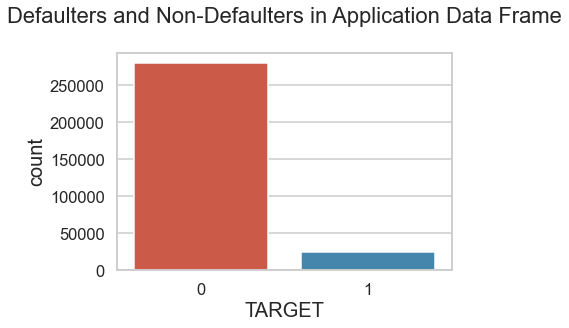

In [115]:
plt.title("Defaulters and Non-Defaulters in Application Data Frame")
sns.countplot(x = "TARGET", data=app_df_filt)
plt.show()

#### Observations
- The Data is highly imbalanced.
- The percentage of Defaulters are ~8%.
- The percentage of Non-Defaulters are ~92%
- The ratio of Non-Defaulters : Defaulters is ~ 9:1. i.e. For every 10 clients there are 9 Non-Defaulters and 1 Defaulter.

## Desegmenting of Application Data Frame 

In [116]:
#Desegmenting Application Data Frame into Data frames i.e. Non-Defaulters and Defaulters
D_app_df_filt=app_df_filt.loc[app_df_filt["TARGET"]==1]
ND_app_df_filt=app_df_filt.loc[app_df_filt["TARGET"]==0]

In [117]:
#Number of Defaulters
D_app_df_filt.shape[0]

24667

In [118]:
#Number of Non-Defaulters
ND_app_df_filt.shape[0]

279864

In [119]:
# Creating separate Data frame consisting Numerical Columns of Application Data Frame based on Data Type.
app_n_df = pd.DataFrame()
for col in num_app:
    app_n_df[col] = app_df_filt[col]
app_n_df.head()

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0      0.139376                         0.0                        0.0   
1      0.535276                         0.0                        0.0   
2      0.729567                         0.0                        0.0   
3      0.535276                         0.0                        0.0   
4      0.535276                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
0                       2.0                       2.0      0.262949   
1                       1.0                       0.0      0.622246   
2                       0.0                       0.0      0.555912   
3                       2.0                       0.0      0.650442   
4                       0.0                       0.0      0.322738   

   AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  \
0         351000.0      24700.5              1.0                  1134.0   
1        1129500.0      35698.5              2.0                   828.0   
2         135000.0       6750.0              1.0                   815.0   
3         297000.0      29686.5              2.0                   617.0   
4         513000.0      21865.5              1.0                  1106.0   

   CNT_CHILDREN  FLAG_DOCUMENT_8  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0             0                0                0                1   
1             0                0                0                1   
2             0                0                0                0   
3             0                0                0                1   
4             0                1                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_9  FLAG_DOCUMENT_21  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0      

In [120]:
app_n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EXT_SOURCE_3                 304531 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_HOUR   304531 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_DAY    304531 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK   304531 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON    304531 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT    304531 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_YEAR   304531 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 10  DEF_60_CNT_SOCIAL_CIRCLE     304531 non-null  float64
 11  EXT_SOURCE_2                 304531 non-null  float64
 12  AMT_GOODS_PRICE              304531 non-null  float64
 13 

In [121]:
# Creating separate Data frame consisting Categorical Columns of Application Data Frame based on Data type.
app_c_df = pd.DataFrame()
for col in categorical_app:
    app_c_df[col] = app_df_filt[col]
app_c_df.head()

OCCUPATION_TYPE NAME_TYPE_SUITE NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        Laborers   Unaccompanied         Cash loans           M            N   
1      Core staff          Family         Cash loans           F            N   
2        Laborers   Unaccompanied    Revolving loans           M            Y   
3        Laborers   Unaccompanied         Cash loans           F            N   
4      Core staff   Unaccompanied         Cash loans           M            N   

  FLAG_OWN_REALTY WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0               Y                  WEDNESDAY  Business Entity Type 3   
1               N                     MONDAY                  School   
2               Y                     MONDAY              Government   
3               Y                  WEDNESDAY  Business Entity Type 3   
4               Y                   THURSDAY                Religion   

   NAME_HOUSING_TYPE    NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE  \
0  House / apartment  Single / not married  Secondary / secondary special   
1  House / apartment               Married               Higher education   
2  House / apartment  Single / not married  Secondary / secondary special   
3  House / apartment        Civil marriage  Secondary / secondary special   
4  House / apartment  Single / not married  Secondary / secondary special   

  NAME_INCOME_TYPE  
0          Working  
1    State servant  
2          Working  
3          Working  
4          Working

In [122]:
app_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   OCCUPATION_TYPE             304531 non-null  object
 1   NAME_TYPE_SUITE             304531 non-null  object
 2   NAME_CONTRACT_TYPE          304531 non-null  object
 3   CODE_GENDER                 304531 non-null  object
 4   FLAG_OWN_CAR                304531 non-null  object
 5   FLAG_OWN_REALTY             304531 non-null  object
 6   WEEKDAY_APPR_PROCESS_START  304531 non-null  object
 7   ORGANIZATION_TYPE           304531 non-null  object
 8   NAME_HOUSING_TYPE           304531 non-null  object
 9   NAME_FAMILY_STATUS          304531 non-null  object
 10  NAME_EDUCATION_TYPE         304531 non-null  object
 11  NAME_INCOME_TYPE            304531 non-null  object
dtypes: object(12)
memory usage: 38.3+ MB


In [123]:
# Default percentage of each sub-categaory within a categorical column
def DefaultPercentage(data, var):
    def_df=pd.DataFrame(columns=['Subcategory', 'Default %'])
    for x in data[var].unique():
        defaulters= data[(data[var]== x) & (data.TARGET==1)].shape[0]
        totalclients= data[data[var]== x].shape[0]
        def_df= def_df.append({'Subcategory': x, 'Default %': (defaulters*100/totalclients)}, ignore_index=True)
    return def_df.sort_values(by='Default %', ascending=False)

## Analysis of variables in Application Data Frame in Segmented groups

#### *Flag Document Types

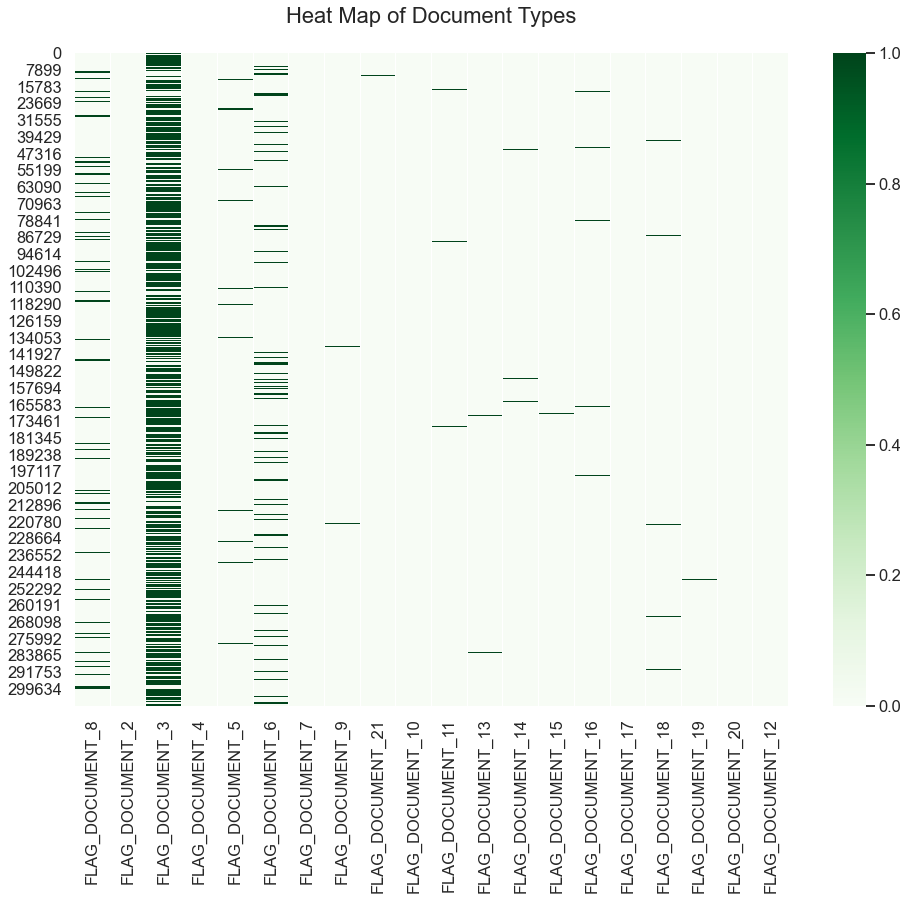

In [124]:
#Heat map to check the frequency of a document provided by client
plt.figure(figsize=(16,12))
sns.heatmap(app_n_df.iloc[:, 17:37], cmap="Greens")
plt.title('Heat Map of Document Types')
plt.show()

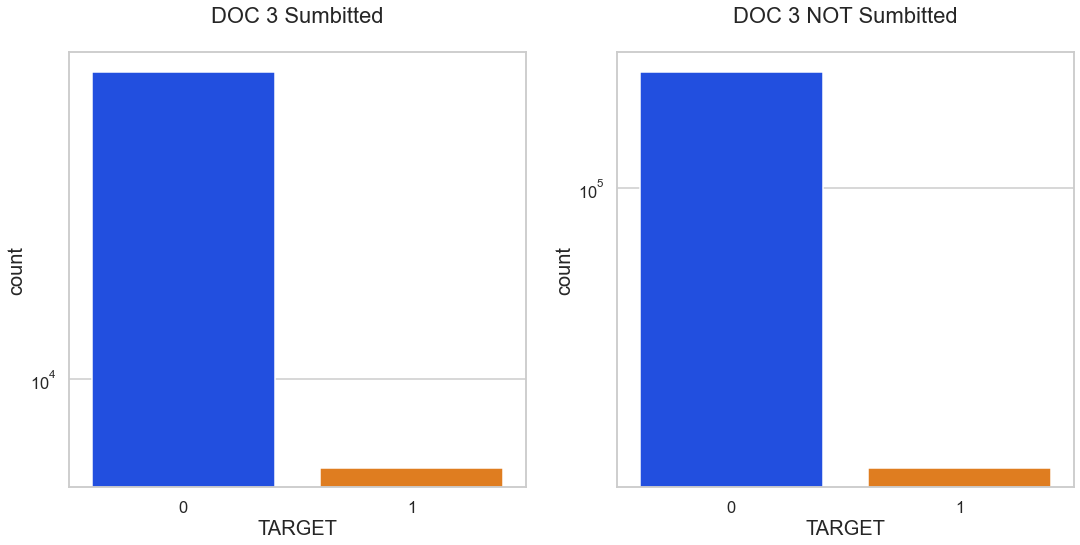

In [125]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1, 2, 1, title='DOC 3 Sumbitted')
ax1.set_yscale('log')
ax2 = fig.add_subplot(1, 2, 2, title='DOC 3 NOT Sumbitted')
ax2.set_yscale('log')
sns.countplot(app_df_filt[app_df_filt['FLAG_DOCUMENT_3']==0]['TARGET'], ax=ax1, palette='bright')
sns.countplot(app_df_filt[app_df_filt['FLAG_DOCUMENT_3']==1]['TARGET'], ax=ax2, palette='bright')
plt.show()

#### Observations
- Document 3 was the common document 'not' provided by Clients, but it doesnt show any different trend among Defaulters and non-defaulters.

#### *Housing Type

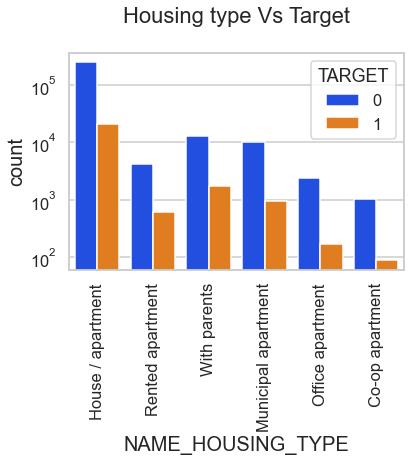

In [126]:
plt.figure()
sns.countplot(app_df_filt['NAME_HOUSING_TYPE'], hue=app_df_filt['TARGET'], palette='bright')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Housing type Vs Target')
plt.show()

In [127]:
DefaultPercentage(app_df_filt, 'NAME_HOUSING_TYPE')

Subcategory  Default %
1     Rented apartment  12.342100
2         With parents  11.767508
3  Municipal apartment   8.511599
5      Co-op apartment   7.880435
0    House / apartment   7.823329
4     Office apartment   6.581494

#### Observations
- Majority clients applied for loan live in House/Apartment.
- Most defaulters are from clients who live in Rented apartments.

#### *Social Circle

Text(0.5, 1.0, 'Correlation of Social Circle variables')

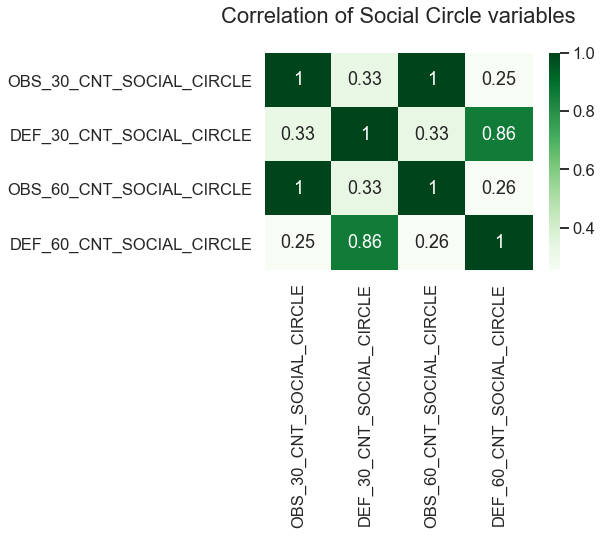

In [128]:
#Correlation among sub-categories of 'SOCIAL_CIRCLE'
sns.heatmap(app_n_df.iloc[:, 7:11].corr(), cmap="Greens", annot=True)
plt.title('Correlation of Social Circle variables')

#### Observations
- 'OBS_30_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE' are directly correlated to each other.
- 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE' are highly correlated to each other
#### Note
- Lets see any trend between defaulters and non-defaulters for column 'OBS_60_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE'

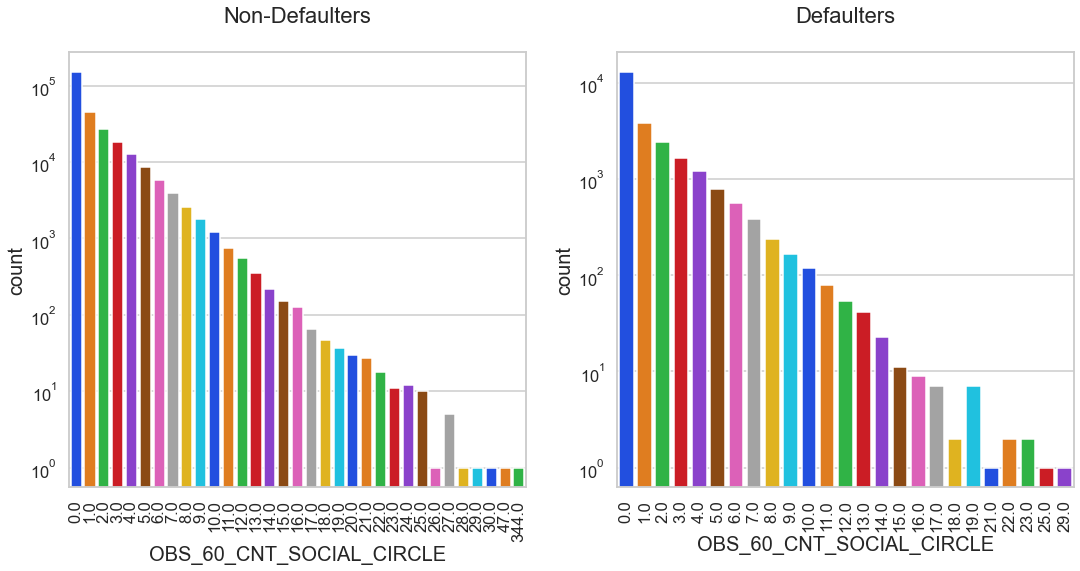

In [129]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax1.set_yscale('log')
ax1.tick_params(axis='x', rotation=90)
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
ax2.set_yscale('log')
ax2.tick_params(axis='x', rotation=90)
sns.countplot(ND_app_df_filt['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax1, palette='bright')
sns.countplot(D_app_df_filt['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax2, palette='bright')
plt.show()

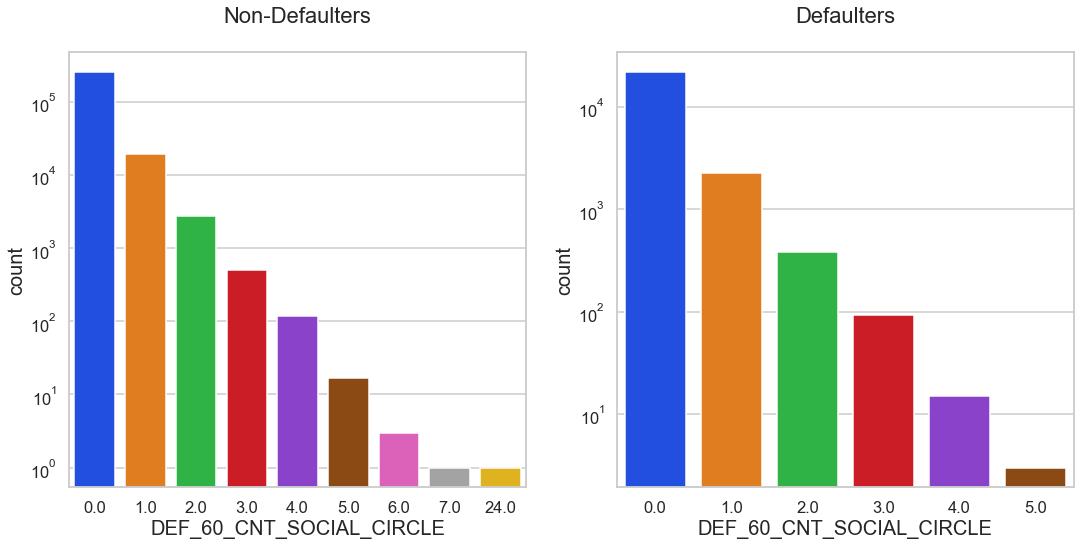

In [130]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax1.set_yscale('log')
#ax1.tick_params(axis='x', rotation=90)
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
ax2.set_yscale('log')
#ax2.tick_params(axis='x', rotation=90)
sns.countplot(ND_app_df_filt['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax1, palette='bright')
sns.countplot(D_app_df_filt['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax2, palette='bright')
plt.show()

#### Observation
- No distinct trend observed in Defaulters and Non-Defaulters for 'OBS_60_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE'. 

#### *Region Specific


In [131]:
reg_app_df = app_n_df.iloc[:, 40:47]
reg_app_df 

LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY  TARGET  \
0                             0                       0       1   
1                             0                       0       0   
2                             0                       0       0   
3                             0                       0       0   
4                             1                       1       0   
...                         ...                     ...     ...   
307506                        0                       0       0   
307507                        0                       0       0   
307508                        1                       1       0   
307509                        0                       1       1   
307510                        1                       1       0   

        REG_CITY_NOT_LIVE_CITY  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
307506                       0                            0   
307507                       0                            0   
307508                       0                            0   
307509                       1                            0   
307510                       0                            0   

        REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION  
0                                0                           0  
1                                0                           0  
2                                0                           0  
3                                0                           0  
4                                0                           0  
...                            ...                         ...  
307506                           0                           0  
307507                           0                           0  
307508                           0                           0  
307509                           0                           0  
307510                           0                           0  

[304531 rows x 7 columns]

In [132]:
reg_app_df['REGION_RATING_CLIENT_W_CITY'] = app_df_filt['REGION_RATING_CLIENT_W_CITY']
reg_app_df['REGION_RATING_CLIENT'] = app_df_filt['REGION_RATING_CLIENT']

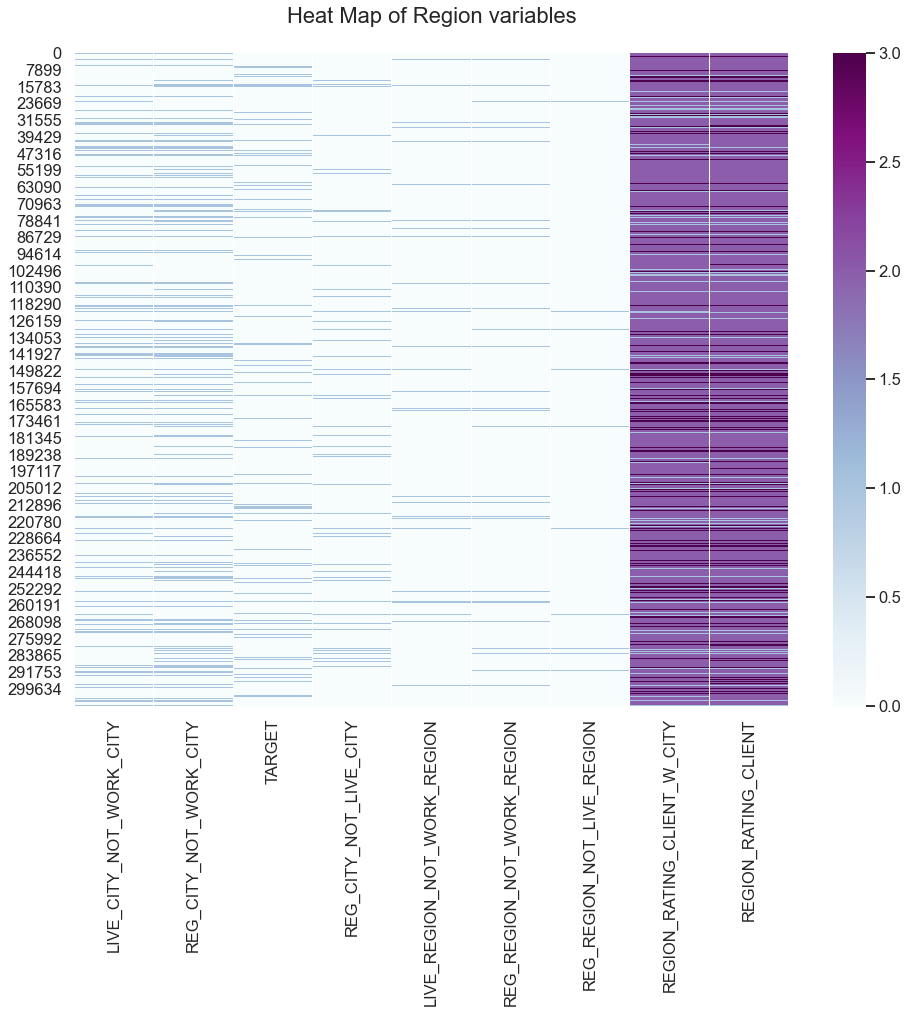

In [133]:
plt.figure(figsize=(16,12))
sns.heatmap(reg_app_df, cmap="BuPu")
plt.title('Heat Map of Region variables')
plt.show()

#### Observation
- 'REG_CITY_NOT_WORK_CITY' AND 'REG_CITY_NOT_WORK_CITY' has similar distribution.
- 'REGION_RATING_CLIENT_W_CITY' AND 'REGION_RATING_CLIENT' has similar distribution.
#### Note
- Region subcategories with varying trends can be checked for Defaulter vs Non-Defaulter trend.

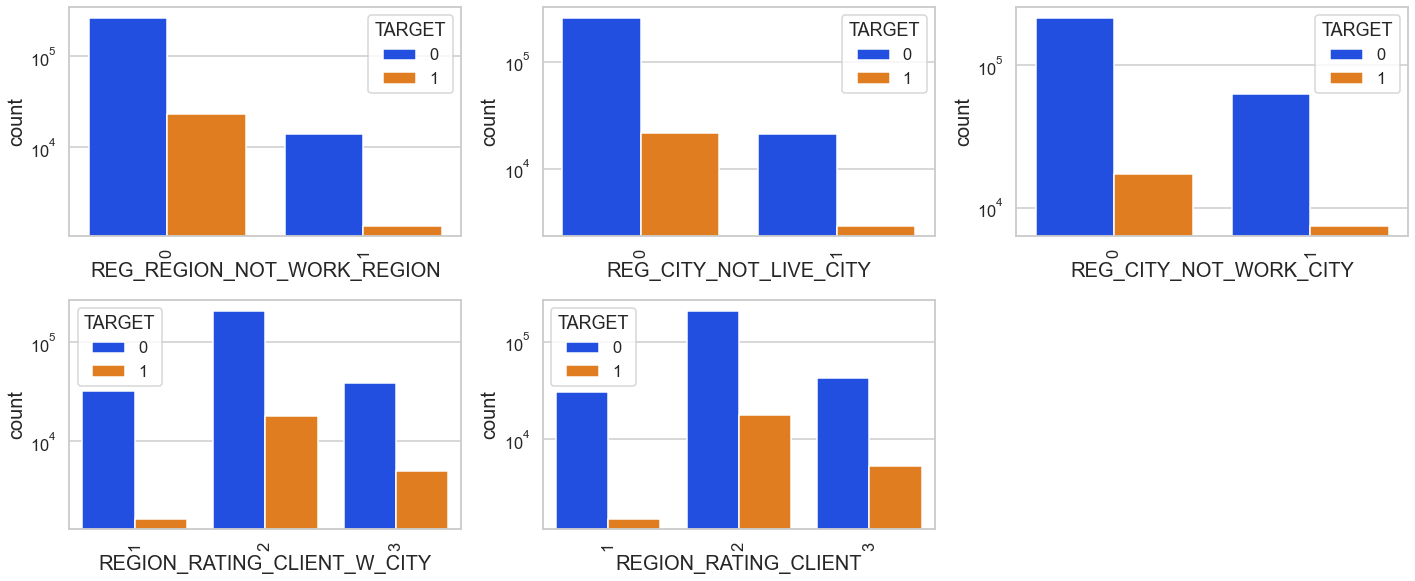

In [134]:
fig=plt.subplots(figsize=(20,20))
for i,j in enumerate(['REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(app_df_filt[j], hue= app_df_filt['TARGET'], palette='bright')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.tight_layout()

In [135]:
DefaultPercentage(app_df_filt, 'REG_REGION_NOT_WORK_REGION')

Subcategory  Default %
1          1.0   8.935977
0          0.0   8.055372

In [136]:
DefaultPercentage(app_df_filt, 'REG_CITY_NOT_LIVE_CITY')

Subcategory  Default %
1          1.0  12.289025
0          0.0   7.744565

In [137]:
DefaultPercentage(app_df_filt, 'REG_CITY_NOT_WORK_CITY')

Subcategory  Default %
1          1.0  10.648689
0          0.0   7.335988

In [138]:
DefaultPercentage(app_df_filt, 'REGION_RATING_CLIENT_W_CITY')

Subcategory  Default %
2          3.0  11.439267
0          2.0   7.939476
1          1.0   4.868569

In [139]:
DefaultPercentage(app_df_filt, 'REGION_RATING_CLIENT')

Subcategory  Default %
2          3.0  11.138898
0          2.0   7.910552
1          1.0   4.848008

#### Observation
- Higher the rating/value of subcategory in all region variables, higher is the Default %.
- Within Region Rating client majority of them are coming from subcategory with value=2.

#### *Owning Asset

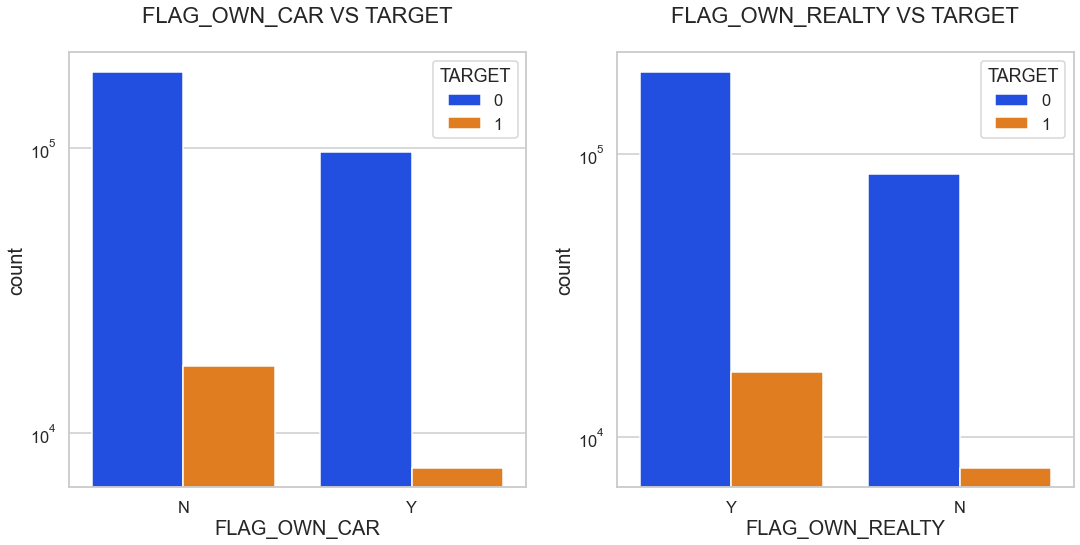

In [140]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1, 2, 1, title='FLAG_OWN_CAR VS TARGET')
ax1.set_yscale('log')
#ax1.tick_params(axis='x', rotation=90)
ax2 = fig.add_subplot(1, 2, 2, title='FLAG_OWN_REALTY VS TARGET')
ax2.set_yscale('log')
#ax2.tick_params(axis='x', rotation=90)
sns.countplot(app_df_filt['FLAG_OWN_CAR'], hue=app_df_filt['TARGET'], ax=ax1, palette='bright')
sns.countplot(app_df_filt['FLAG_OWN_REALTY'],hue=app_df_filt['TARGET'], ax=ax2, palette='bright')
plt.show()

In [141]:
DefaultPercentage(app_df_filt, 'FLAG_OWN_CAR')

Subcategory  Default %
0           N   8.527201
1           Y   7.271692

In [142]:
DefaultPercentage(app_df_filt, 'FLAG_OWN_REALTY')

Subcategory  Default %
1           N   8.377651
0           Y   7.978133

#### Observation
- Majority of clients own realty but not own car.
- Default % is higher among those who dont own asset.

#### * Family Satus

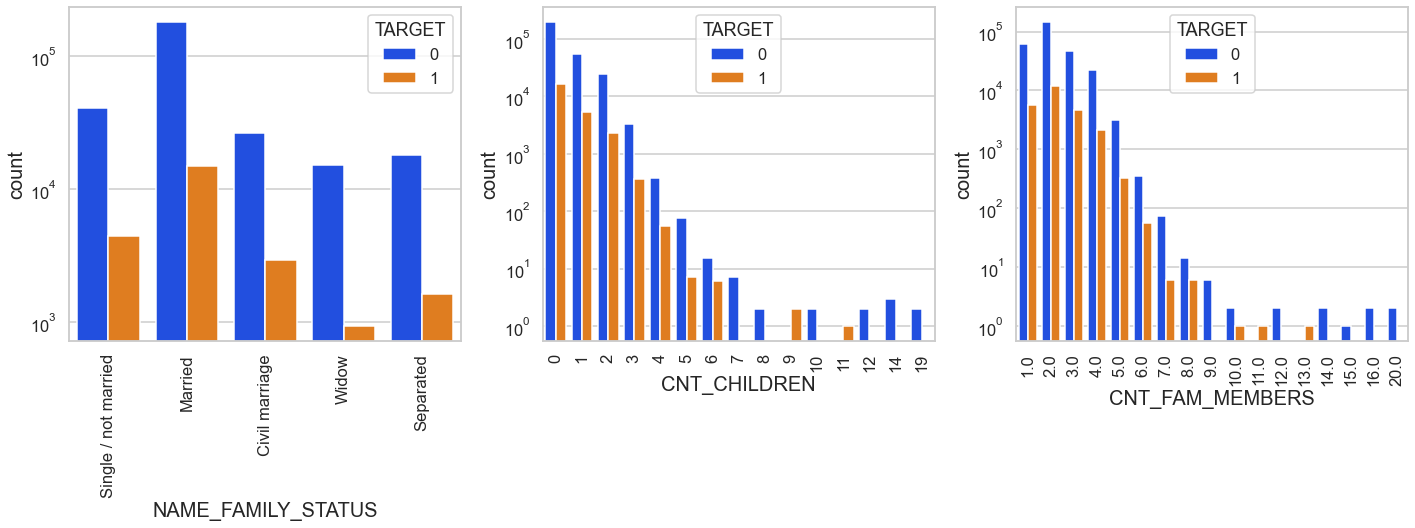

In [143]:
fig=plt.subplots(figsize=(20,20))
for i,j in enumerate(['NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(app_df_filt[j], hue= app_df_filt['TARGET'], palette='bright')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.tight_layout()

In [144]:
DefaultPercentage(app_df_filt, 'CNT_CHILDREN')

Subcategory   Default %
9           9.0  100.000000
10         11.0  100.000000
7           6.0   28.571429
4           4.0   12.910798
3           3.0    9.701087
1           1.0    8.944151
2           2.0    8.754056
6           5.0    8.333333
0           0.0    7.739231
5           7.0    0.000000
8           8.0    0.000000
11         12.0    0.000000
12         10.0    0.000000
13         19.0    0.000000
14         14.0    0.000000

In [145]:
DefaultPercentage(app_df_filt, 'NAME_FAMILY_STATUS')

Subcategory  Default %
2        Civil marriage   9.968795
0  Single / not married   9.876103
4             Separated   8.214213
1               Married   7.580910
3                 Widow   5.839874

In [146]:
DefaultPercentage(app_df_filt, 'CNT_FAM_MEMBERS')

Subcategory   Default %
16         11.0  100.000000
10         13.0  100.000000
9          10.0   33.333333
8           8.0   30.000000
5           6.0   13.546798
4           5.0    9.471238
2           3.0    8.781864
3           4.0    8.674512
0           1.0    8.407495
1           2.0    7.605045
7           7.0    7.407407
6           9.0    0.000000
11         14.0    0.000000
12         12.0    0.000000
13         20.0    0.000000
14         15.0    0.000000
15         16.0    0.000000

#### Observation
- Majority Clients are Married (not civil marriage) or Single, and with low number of Family members and children.
- Greater the no. of children and Family members greater is the Default %.

##### * Education, Income, Occupation, Gender and Age

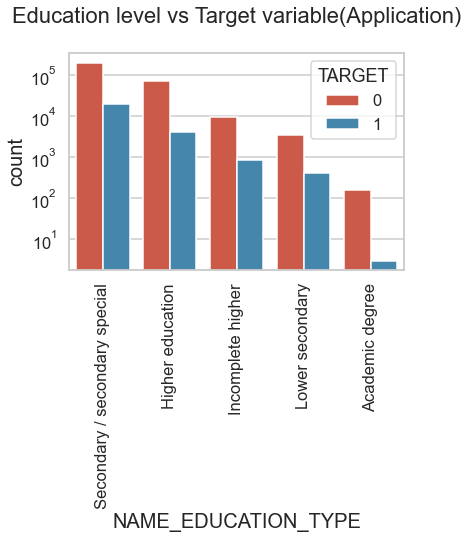

In [147]:
#Education
sns.countplot(app_df_filt['NAME_EDUCATION_TYPE'], hue=app_df_filt['TARGET'])
plt.title('Education level vs Target variable(Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [148]:
DefaultPercentage(app_df_filt, 'NAME_EDUCATION_TYPE')

Subcategory  Default %
3                Lower secondary  10.897098
0  Secondary / secondary special   8.963349
2              Incomplete higher   8.501229
1               Higher education   5.381937
4                Academic degree   1.840491

#### Observations
- Majority clients have Secondary/Secondary speacial education level.
- People with lower education level have the highest default %.

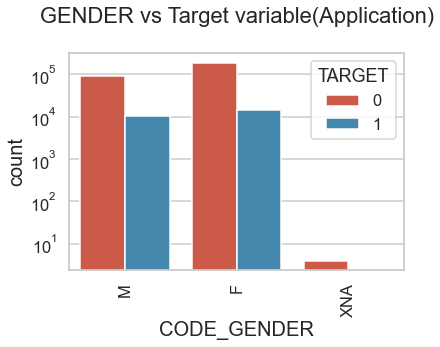

In [149]:
#Gender
sns.countplot(app_df_filt['CODE_GENDER'], hue=app_df_filt['TARGET'])
plt.title('GENDER vs Target variable(Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [150]:
DefaultPercentage(app_df_filt, 'CODE_GENDER')

Subcategory  Default %
0           M  10.191744
1           F   7.014595
2         XNA   0.000000

#### Observations
- Majority clients are Female.
- Males have higher default % than Females.

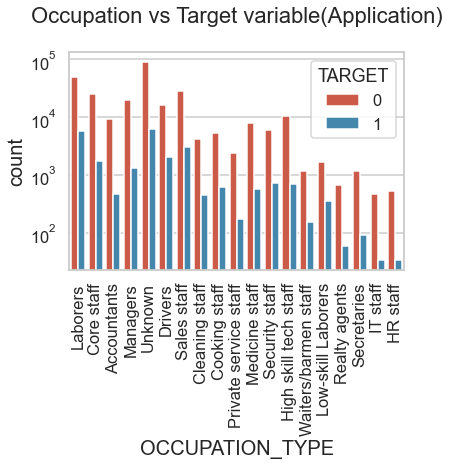

In [151]:
#Occupation
sns.countplot(app_df_filt['OCCUPATION_TYPE'], hue=app_df_filt['TARGET'])
plt.title('Occupation vs Target variable(Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [152]:
DefaultPercentage(app_df_filt, 'OCCUPATION_TYPE')

Subcategory  Default %
14     Low-skill Laborers  17.284545
13   Waiters/barmen staff  11.385768
5                 Drivers  11.367577
11         Security staff  10.754462
0                Laborers  10.608441
8           Cooking staff  10.512038
7          Cleaning staff   9.642470
6             Sales staff   9.635105
15          Realty agents   7.951482
16            Secretaries   7.115236
10         Medicine staff   6.691098
17               IT staff   6.653620
9   Private service staff   6.542412
4                 Unknown   6.534290
1              Core staff   6.330925
3                Managers   6.251776
12  High skill tech staff   6.180623
18               HR staff   6.093190
2             Accountants   4.866983

#### Observations
- Laborers and Sales staff avail for maximum no. of loans.
- Low-skilled laborers have highest Default %. 

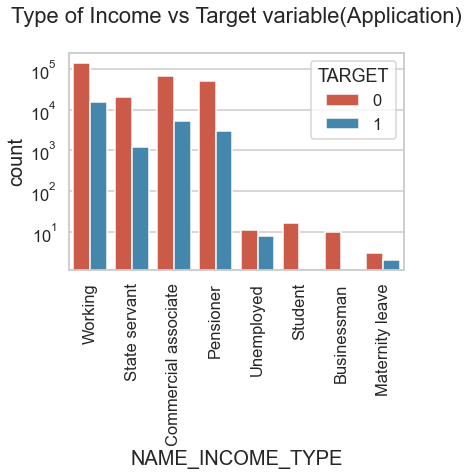

In [153]:
#Income
sns.countplot(app_df_filt['NAME_INCOME_TYPE'], hue=app_df_filt['TARGET'])
plt.title('Type of Income vs Target variable(Application)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [154]:
DefaultPercentage(app_df_filt, 'NAME_INCOME_TYPE')

Subcategory  Default %
4            Unemployed  42.105263
7       Maternity leave  40.000000
0               Working   9.620506
2  Commercial associate   7.517586
1         State servant   5.761719
3             Pensioner   5.395598
5               Student   0.000000
6           Businessman   0.000000

#### Observations
- Majority of clients are Working professional or Pensioners.
- Least clients are Students, Bussinessman and MAternity leavers.
- Highest Defaulters % are those who are either Unemployed or on Maternity Leave.

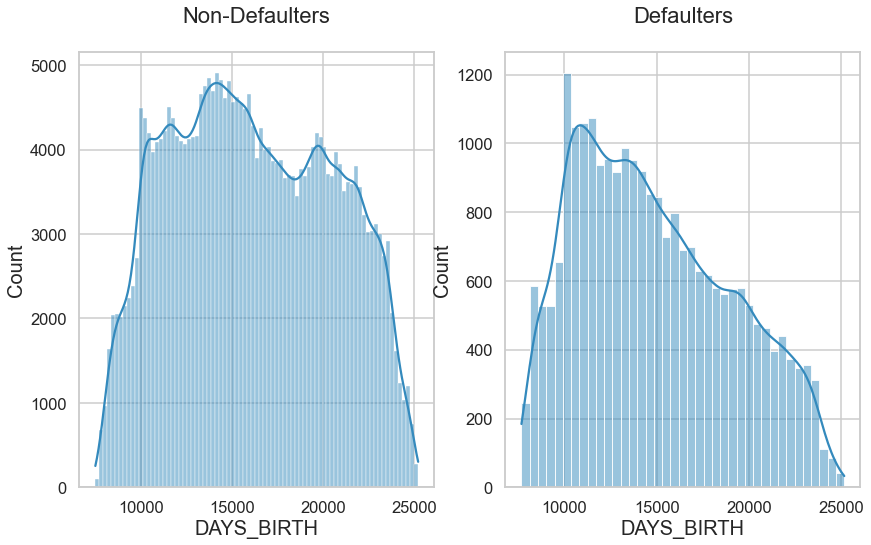

In [155]:
# Age

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.histplot(ND_app_df_filt['DAYS_BIRTH'], ax=ax1, kde=True)
sns.histplot(D_app_df_filt['DAYS_BIRTH'], ax=ax2, kde=True)
plt.show()

#### Observation
- People of age greater than ~12000 days; i.e. ~32 yrs old have a decreasing trend of defaulters.
- As age increases, chances of that client defaulting decreases.

#### *Outlier Check

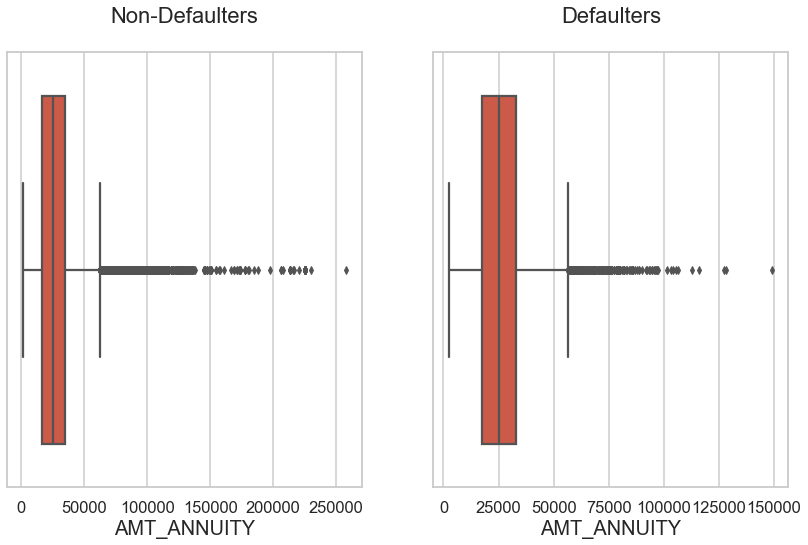

In [156]:
#Amount Annuity
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_app_df_filt['AMT_ANNUITY'], ax=ax1)
sns.boxplot(D_app_df_filt['AMT_ANNUITY'], ax=ax2)
plt.show()

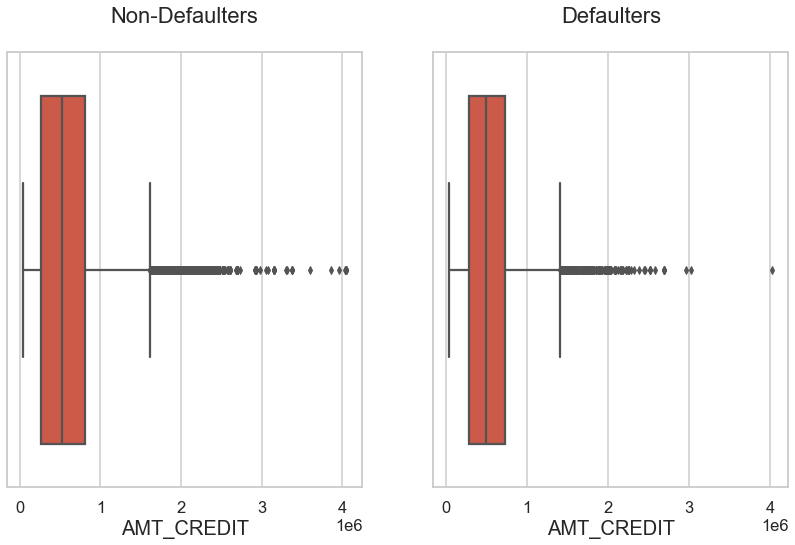

In [157]:
#Amount CREDIT
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_app_df_filt['AMT_CREDIT'], ax=ax1)
sns.boxplot(D_app_df_filt['AMT_CREDIT'], ax=ax2)
plt.show()

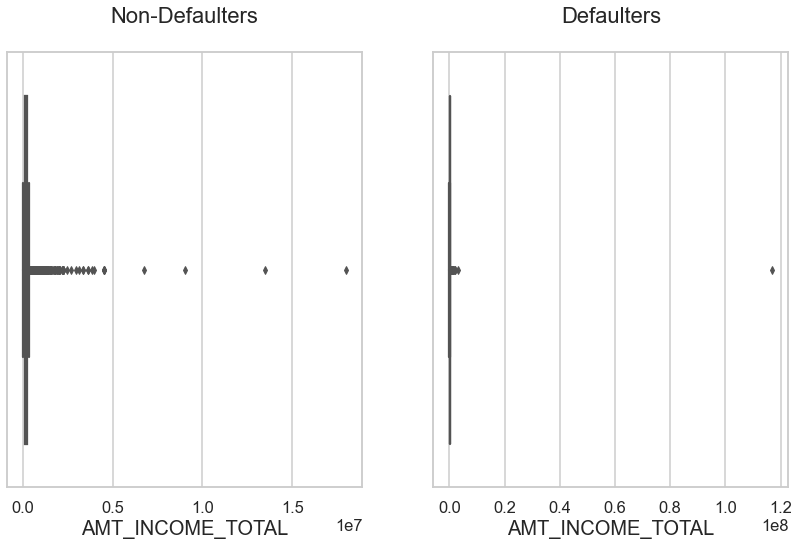

In [158]:
# Amount Income total
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_app_df_filt['AMT_INCOME_TOTAL'], ax=ax1)
sns.boxplot(D_app_df_filt['AMT_INCOME_TOTAL'], ax=ax2)
plt.show()

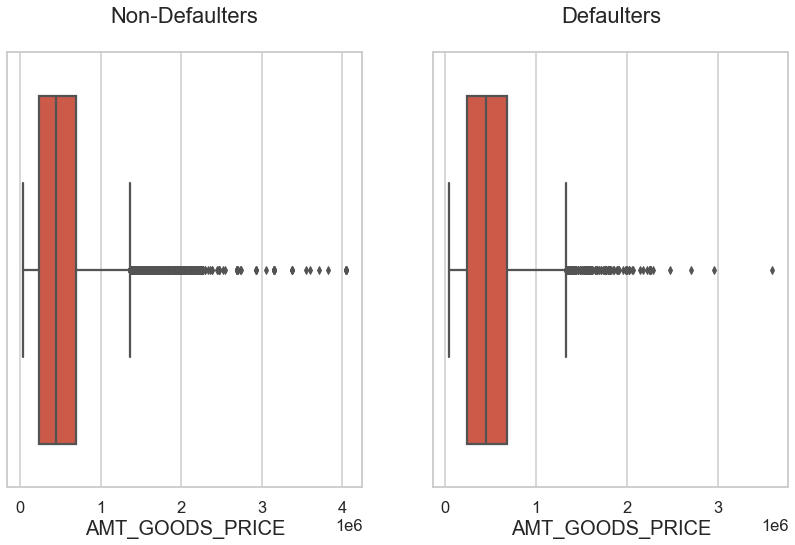

In [159]:
# Amount Income total
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.boxplot(ND_app_df_filt['AMT_GOODS_PRICE'], ax=ax1)
sns.boxplot(D_app_df_filt['AMT_GOODS_PRICE'], ax=ax2)
plt.show()

#### Observations
- All these numerical variables have Outliers.
- Generally box-plot of distribution of Annuity, Goods Price, credit and Income total reveal that Outliers in Non-Defaulters have higher values compared to Non-Defaulters.

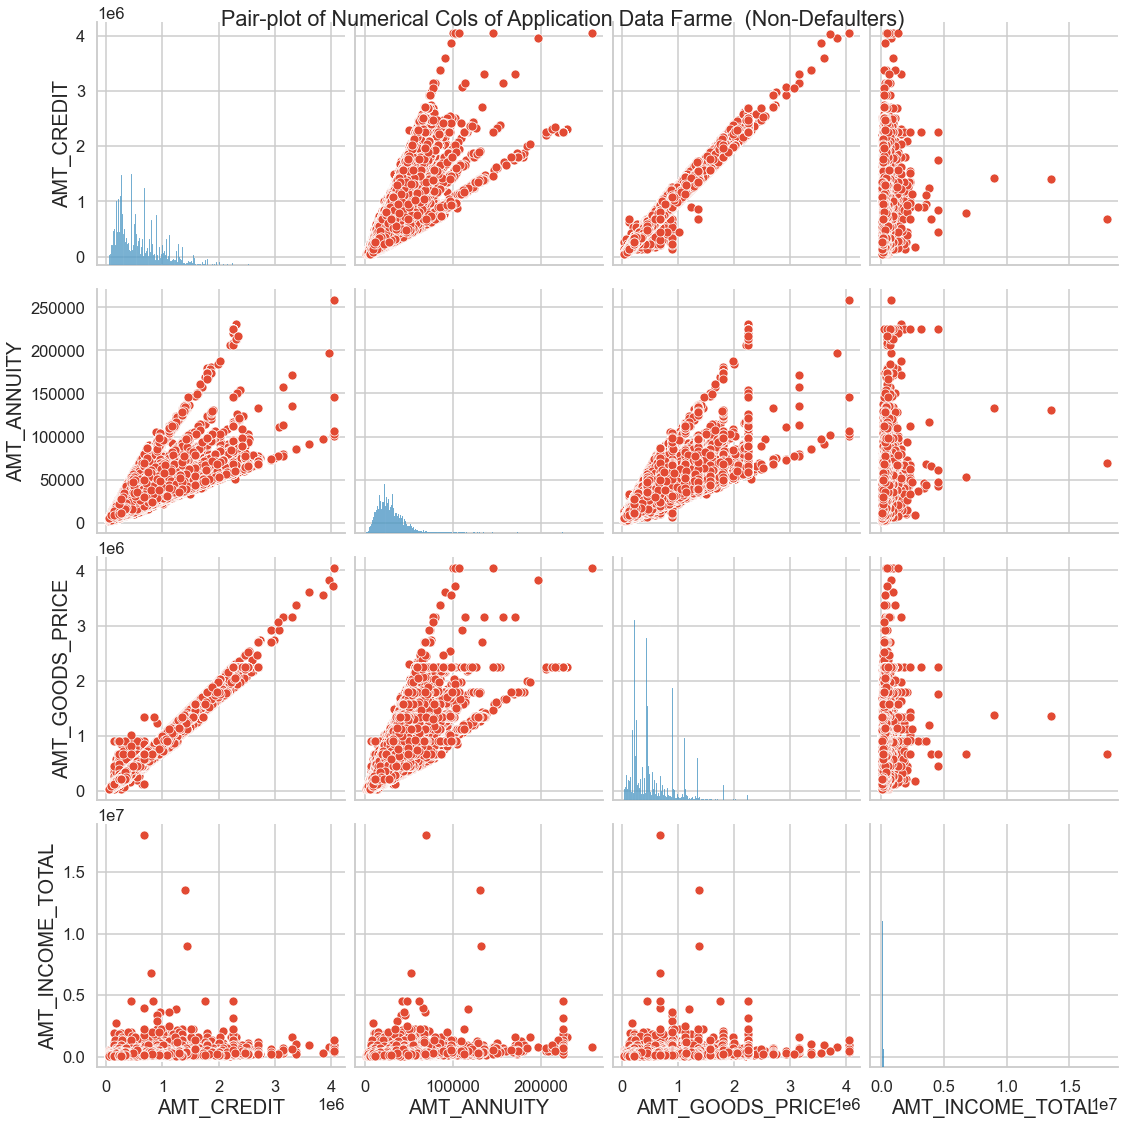

In [160]:
#Numerical cols with high correlation are visualised in more detail using pair-plot.
sns.pairplot(data=ND_app_df_filt, vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL'], height=4)
plt.suptitle('Pair-plot of Numerical Cols of Application Data Farme  (Non-Defaulters)')
plt.show()

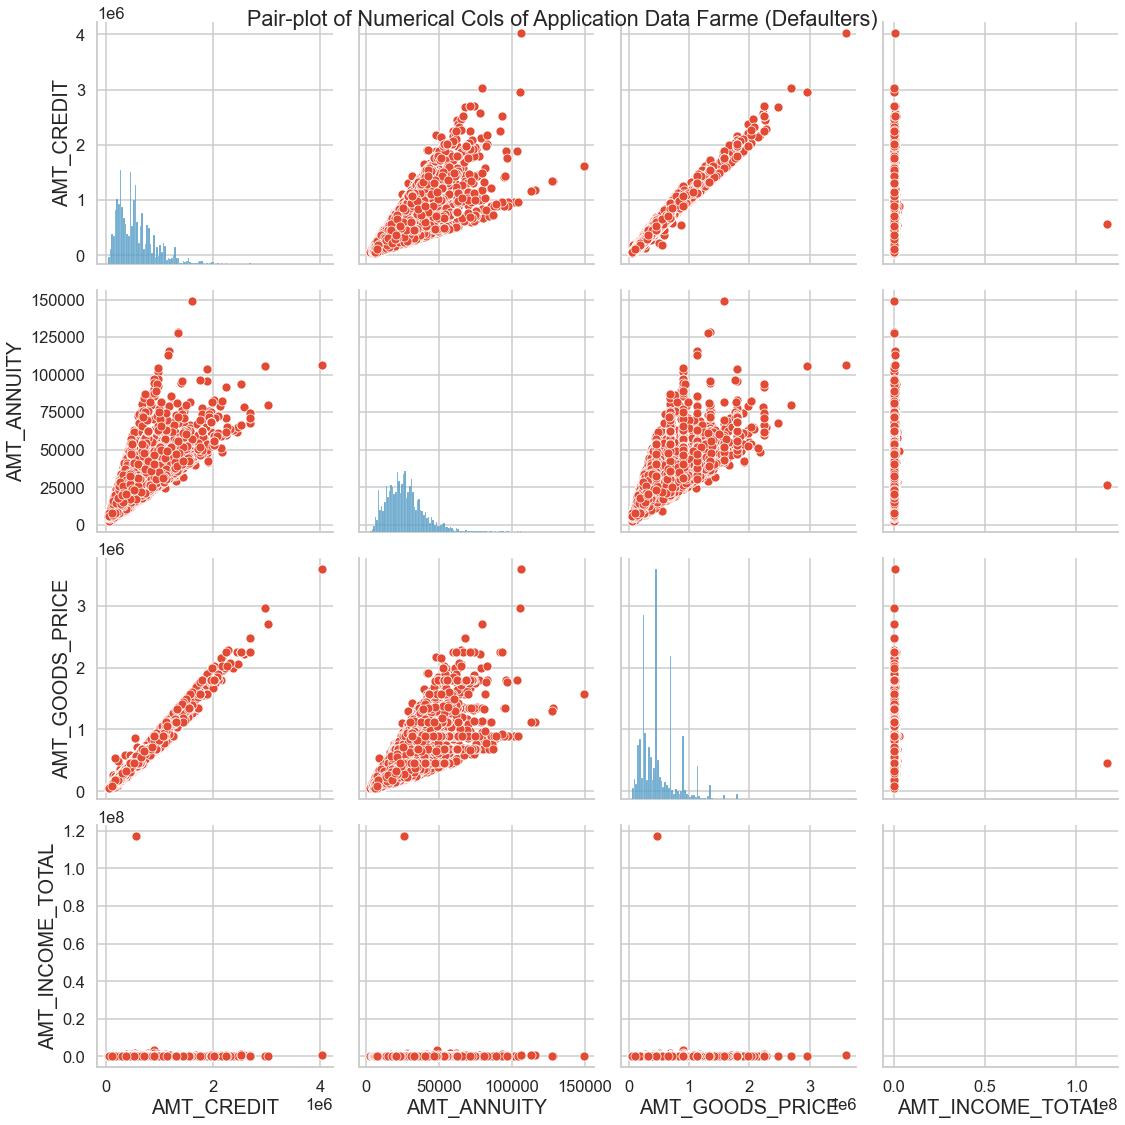

In [161]:
#Numerical cols with high correlation are visualised in more detail using pair-plot.
sns.pairplot(data=D_app_df_filt, vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL'], height=4)
plt.suptitle('Pair-plot of Numerical Cols of Application Data Farme (Defaulters)')
plt.show()

#### Observation
- 'AMT_CREDIT' and 'AMT_GOODS_PRICE' are directly correlated with each other.
- 'AMT_ANNUITY' is highly corelated with 'AMT_CREDIT' and 'AMT_GOODS_PRICE'.
- 'AMT_INCOME_TOTAL doesnt show any significant correlation with either of these:- 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY'
- Following pair-plot shows similar trend for the above mentioned Numerical cols for both Non-Defaulter and Defaulters.

#### *External sources

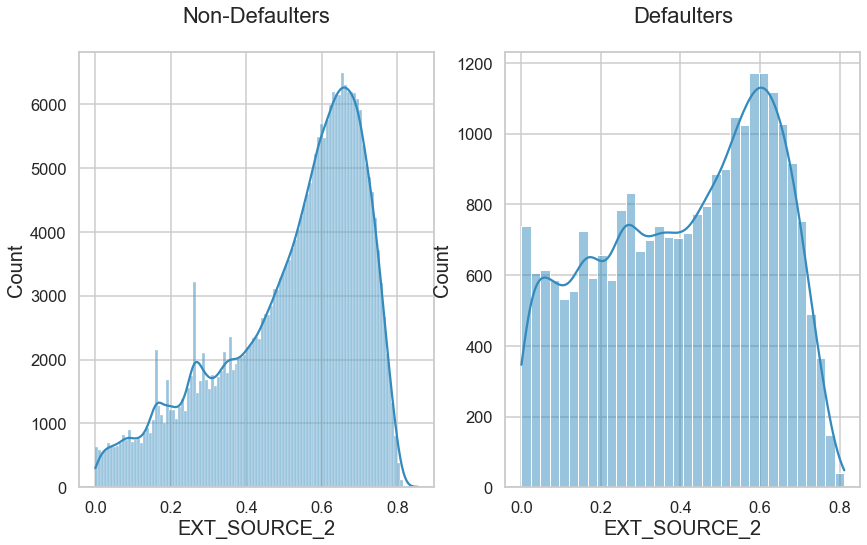

In [162]:
#External Source 2
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.histplot(ND_app_df_filt['EXT_SOURCE_2'], ax=ax1, kde=True)
sns.histplot(D_app_df_filt['EXT_SOURCE_2'], ax=ax2, kde=True)
plt.show()

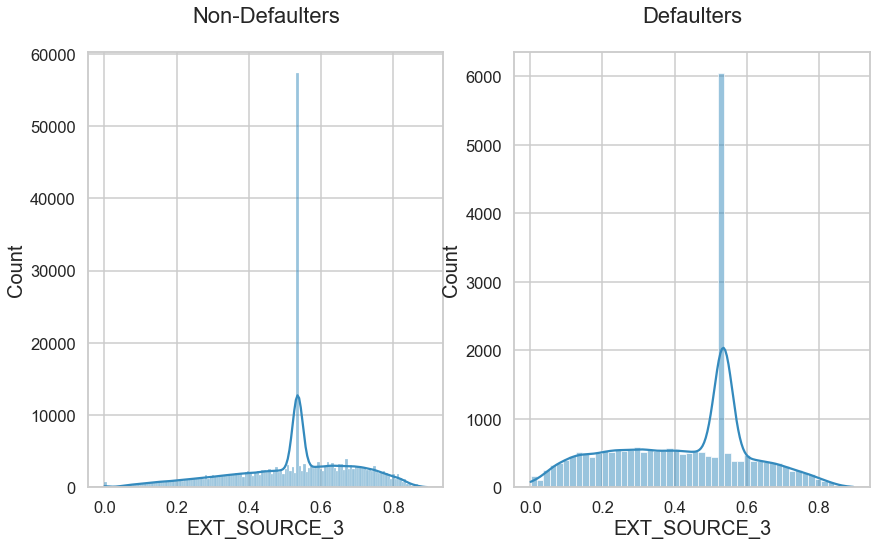

In [163]:
#External Source 3
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1, 2, 1, title='Non-Defaulters')
ax2 = fig.add_subplot(1, 2, 2, title='Defaulters')
sns.histplot(ND_app_df_filt['EXT_SOURCE_3'], ax=ax1, kde=True )
sns.histplot(D_app_df_filt['EXT_SOURCE_3'], ax=ax2, kde=True)
plt.show()

#### Observation
- Distrbution of values among defaulters and Defaulters is bit different for External Sources 2 and 3. 

In [164]:
## Desegmenting Numerical Columns of Application Data frame for Defaulter and non-Defaulters
D_app_n_df=app_n_df.loc[app_n_df["TARGET"]==1]
ND_app_n_df=app_n_df.loc[app_n_df["TARGET"]==0]

In [165]:
#Creating list of correlations for Non-Defaulters
ND_app_n_df_corr = ND_app_n_df.corr()
round(ND_app_n_df_corr, 2)
ND_app_n_df_corr_list = ND_app_n_df_corr.unstack()

In [166]:
ND_app_n_df_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

EXT_SOURCE_3                 EXT_SOURCE_3                  1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998513
AMT_GOODS_PRICE              AMT_CREDIT                    0.987260
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.949905
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.878681
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861303
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859458
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.830488
AMT_GOODS_PRICE              AMT_ANNUITY                   0.775838
AMT_CREDIT                   AMT_ANNUITY                   0.770379
DAYS_EMPLOYED                DAYS_BIRTH                    0.626129
dtype: float64

#### Observation
- Above Mentioned list contains the top 10 correlation among Numerical columns for Non-Defaulters.

In [167]:
#Creating list of correlations for Defaulters
D_app_n_df_corr = D_app_n_df.corr()
round(D_app_n_df_corr, 2)
D_app_n_df_corr_list = D_app_n_df_corr.unstack()

In [168]:
D_app_n_df_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

EXT_SOURCE_3                 EXT_SOURCE_3                   1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998286
AMT_GOODS_PRICE              AMT_CREDIT                     0.983065
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956477
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885556
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869761
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847260
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778110
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752206
AMT_CREDIT                   AMT_ANNUITY                    0.751400
DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.617299
dtype: float64

#### Observation
- Above Mentioned list contains the top 10 correlation among Numerical columns for Defaulters

## Summary for Application Data Frame
- The Data was highly imabalanced.
- Data Cleaning was very similar to Previous Application Data Frame.
#### Few columns such as Age, Education Type, Gender, Marrital Status, Family Members, Occupation Type showed remarkable trend for Defaulter % for specific sub-categories and/or overall variable distribution in comparison to Non-defaulters.
- For this Application a list of Default % was utilised to identify sub-categories having highest Default % instead of barplot which was used in Previous Application, because the no. of columns were higher.
- For certain columns/variables which showed showed similar trend for Defaulters and Non-Defaulters, they are ignored as they dont provide any valuable information.
- Default % values for each columns for their Sub-categories have been mentioned at the end of Analysis of those columns.